In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.odr import ODR, Model, RealData
from scipy.optimize import curve_fit
import pandas as pd
import glob
import os
from scipy.signal import find_peaks
import scipy.odr as odr
import uncertainties
from scipy.optimize import fsolve, root
import numpy.lib.recfunctions as rfn
from scipy.optimize import minimize
from scipy import special
from scipy.constants import hbar, m_e, e
from scipy.optimize import brentq
import matplotlib.ticker as mtick
from typing import Callable
from functools import partial
from scipy.signal import find_peaks
import scipy.optimize as opt
from scipy.signal import butter, filtfilt
from scipy.interpolate import interp1d

from adjustText import adjust_text

from scipy import linalg, optimize
import matplotlib.ticker as mtick
from matplotlib.ticker import MultipleLocator, AutoMinorLocator

from IPython.display import Latex
from ipywidgets import interactive
#from IPython.display import FloatSliderWidget, IntSliderWidget
#from Ipython.html import widgets
#from IPython.html.widgets import FloatSliderWidget, IntSliderWidget
%pylab inline --no-import-all
import locale
from scipy import signal


%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [ ]:
#%% Celda para configurar tipografía
 
SMALL_SIZE = 10
MEDIUM_SIZE = 15
BIGGER_SIZE = 20
 

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
 
#%% Celda para crear figura
fig,ax1 =plt.subplots(figsize=(8,5),constrained_layout=True) #con figsize me defino la proporción de los ejes
plt.plot(x,y)
# con las siguientes lineas uno puede agregar mallado al gráfico
ax1.grid(which = "major", linewidth = 1)
ax1.grid(which = "minor", linewidth = 0.2)
ax1.minorticks_on()
# Para guardar la figura 
plt.savefig('carpeta\nombredelarchivo.png',dpi=350,transparent=True)
#también se pueden guardar en pdf o en svg
plt.show()

# spectros


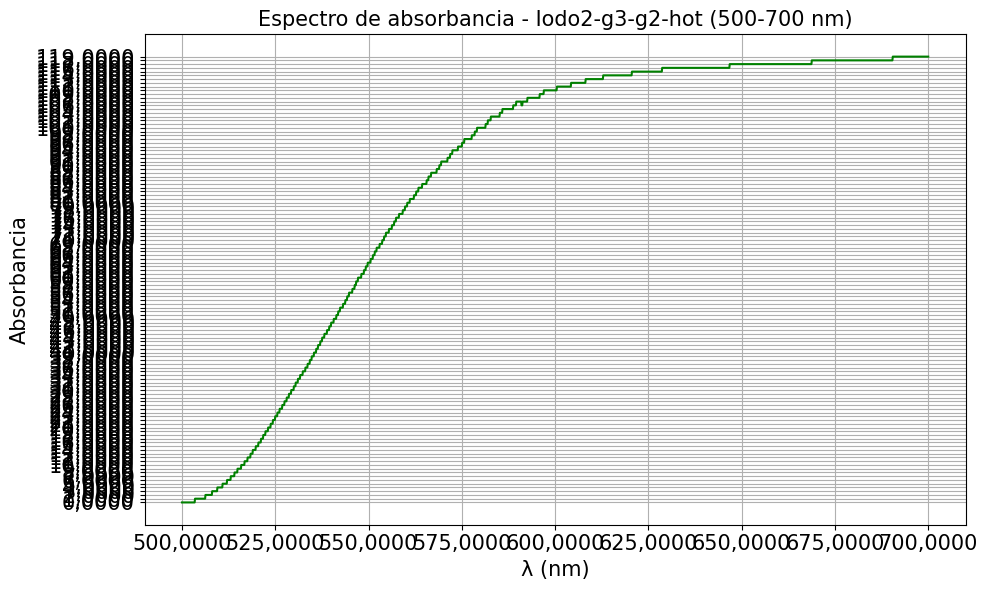

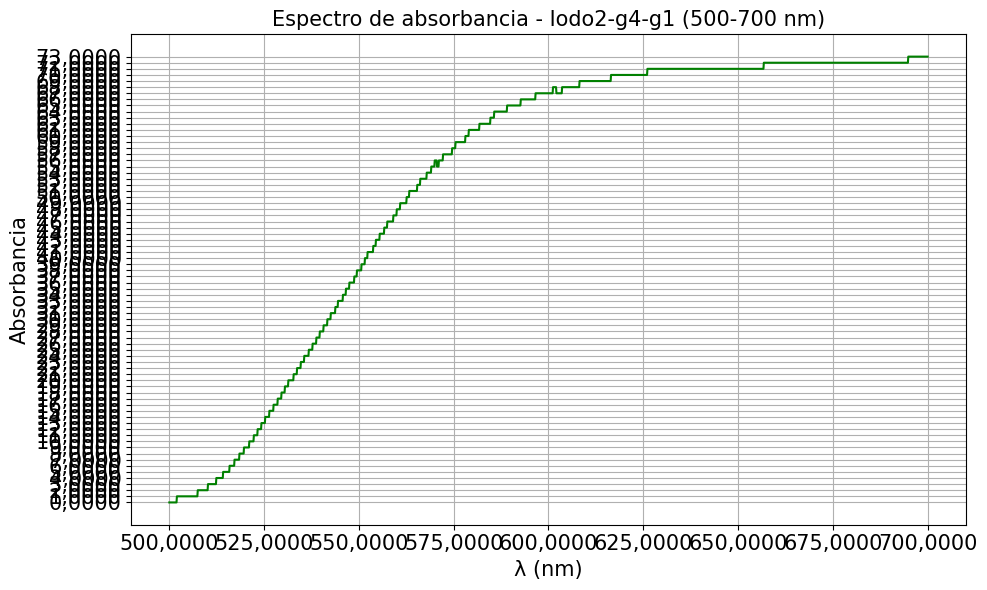

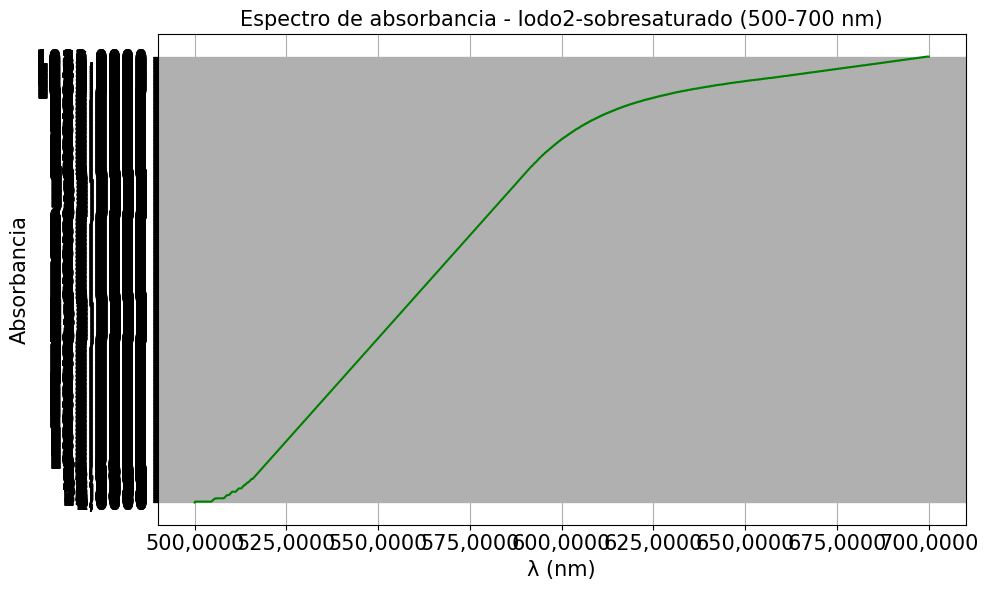

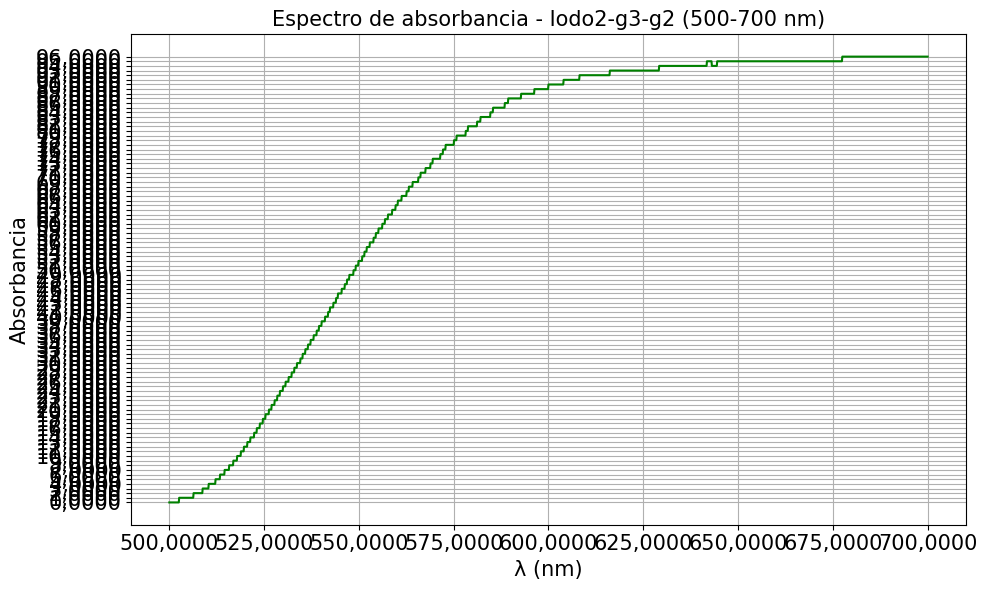

In [3]:

# === FORMATEO DE EJES ===
def formato_coma(x, pos):
    return f"{x:.4f}".replace('.', ',')
# === RUTA PRINCIPAL ===
base_dir = r"C:\UNLP\3°\2° cuatrimestre\Exp Cuánticos I\EXP 3"
# === ARCHIVOS ADICIONALES ===
otros_archivos = [
    os.path.join(base_dir, "Iodo2-g3-g2-hot.txt"),
    os.path.join(base_dir, "Iodo2-g4-g1.txt"),
    os.path.join(base_dir, "Iodo2-sobresaturado.txt"),
    os.path.join(base_dir, "Iodo2-g3-g2.txt"),
]

# === GRAFICO INDIVIDUAL PARA CADA ARCHIVO ===
for archivo in otros_archivos:
    if os.path.exists(archivo):
        df_extra = pd.read_csv(archivo, sep=',', skiprows=1)
        
        # Aplicar máscara 500-700 nm
        mask_extra = (df_extra.iloc[:, 0] >= 500) & (df_extra.iloc[:, 0] <= 700)
        df_extra = df_extra[mask_extra]

        Lambda_extra = df_extra.iloc[:, 0]
        Abs_extra = df_extra.iloc[:, 1]
        etiqueta = os.path.splitext(os.path.basename(archivo))[0]

        plt.figure(figsize=(10,6))
        plt.plot(Lambda_extra, Abs_extra, color='green')
        plt.xlabel("λ (nm)")
        plt.ylabel("Absorbancia")
        plt.title(f"Espectro de absorbancia - {etiqueta} (500-700 nm)")
        plt.grid(True)
        plt.gca().xaxis.set_major_formatter(mtick.FuncFormatter(formato_coma))
        plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(formato_coma))
        plt.tight_layout()
        plt.show()

    else:
        print(f"⚠️ Archivo no encontrado: {archivo}")

<>:10: SyntaxWarning: invalid escape sequence '\s'
<>:13: SyntaxWarning: invalid escape sequence '\s'
<>:10: SyntaxWarning: invalid escape sequence '\s'
<>:13: SyntaxWarning: invalid escape sequence '\s'
C:\Users\elisa\AppData\Local\Temp\ipykernel_24932\2176388844.py:10: SyntaxWarning: invalid escape sequence '\s'
  df_i2 = pd.read_csv(archivo_i2, sep='\s+', header=0)
C:\Users\elisa\AppData\Local\Temp\ipykernel_24932\2176388844.py:13: SyntaxWarning: invalid escape sequence '\s'
  df_T = pd.read_csv(archivo_T, sep='\s+', header=0)


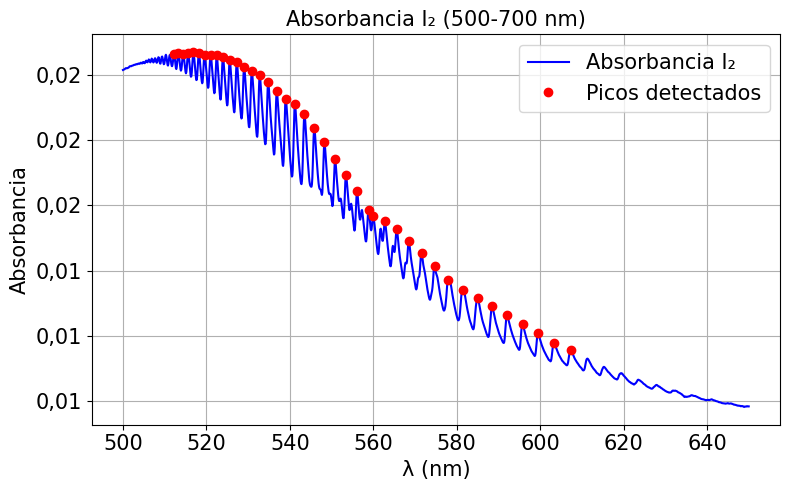

=== Picos detectados ===
Pico 1: λ = 512.30 nm, Abs = 0.0167
Pico 2: λ = 513.30 nm, Abs = 0.0167
Pico 3: λ = 514.40 nm, Abs = 0.0167
Pico 4: λ = 515.60 nm, Abs = 0.0167
Pico 5: λ = 516.90 nm, Abs = 0.0167
Pico 6: λ = 518.20 nm, Abs = 0.0167
Pico 7: λ = 519.60 nm, Abs = 0.0167
Pico 8: λ = 521.00 nm, Abs = 0.0167
Pico 9: λ = 522.50 nm, Abs = 0.0166
Pico 10: λ = 524.00 nm, Abs = 0.0166
Pico 11: λ = 525.60 nm, Abs = 0.0166
Pico 12: λ = 527.30 nm, Abs = 0.0166
Pico 13: λ = 529.10 nm, Abs = 0.0166
Pico 14: λ = 530.90 nm, Abs = 0.0165
Pico 15: λ = 532.80 nm, Abs = 0.0165
Pico 16: λ = 534.80 nm, Abs = 0.0164
Pico 17: λ = 536.90 nm, Abs = 0.0164
Pico 18: λ = 539.00 nm, Abs = 0.0163
Pico 19: λ = 541.20 nm, Abs = 0.0163
Pico 20: λ = 543.50 nm, Abs = 0.0162
Pico 21: λ = 545.90 nm, Abs = 0.0161
Pico 22: λ = 548.30 nm, Abs = 0.0160
Pico 23: λ = 550.80 nm, Abs = 0.0159
Pico 24: λ = 553.50 nm, Abs = 0.0157
Pico 25: λ = 556.10 nm, Abs = 0.0156
Pico 26: λ = 558.90 nm, Abs = 0.0155
Pico 27: λ = 560.00 nm

C:\Users\elisa\AppData\Local\Temp\ipykernel_24932\2176388844.py:61: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  ax1.plot(Lambda_T[peaks], A[peaks], 'ro', color='#b51d1c', label="Picos detectados")


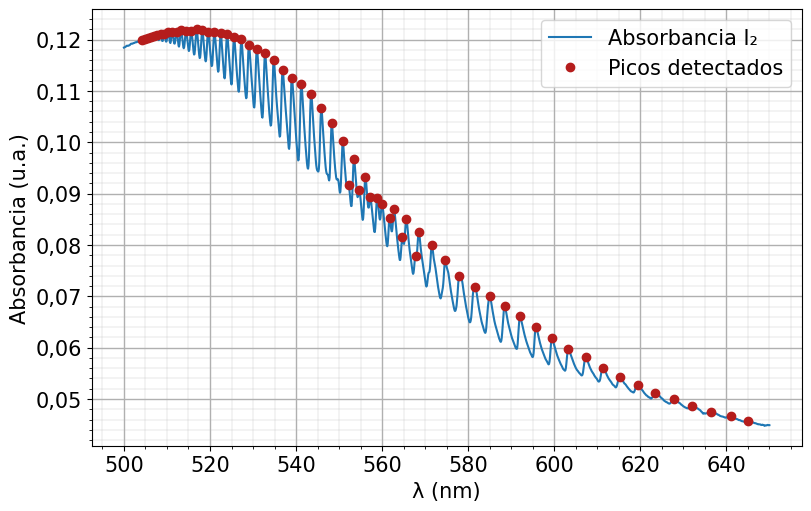

=== Picos detectados ===
Pico 1: λ = 504.30 nm, Abs = 0.1199
Pico 2: λ = 504.90 nm, Abs = 0.1200
Pico 3: λ = 505.60 nm, Abs = 0.1203
Pico 4: λ = 506.20 nm, Abs = 0.1205
Pico 5: λ = 506.90 nm, Abs = 0.1207
Pico 6: λ = 507.70 nm, Abs = 0.1208
Pico 7: λ = 508.50 nm, Abs = 0.1210
Pico 8: λ = 509.40 nm, Abs = 0.1211
Pico 9: λ = 510.30 nm, Abs = 0.1215
Pico 10: λ = 511.20 nm, Abs = 0.1214
Pico 11: λ = 512.30 nm, Abs = 0.1215
Pico 12: λ = 513.30 nm, Abs = 0.1218
Pico 13: λ = 514.40 nm, Abs = 0.1216
Pico 14: λ = 515.60 nm, Abs = 0.1217
Pico 15: λ = 516.90 nm, Abs = 0.1220
Pico 16: λ = 518.20 nm, Abs = 0.1218
Pico 17: λ = 519.60 nm, Abs = 0.1215
Pico 18: λ = 521.00 nm, Abs = 0.1215
Pico 19: λ = 522.50 nm, Abs = 0.1214
Pico 20: λ = 524.00 nm, Abs = 0.1210
Pico 21: λ = 525.60 nm, Abs = 0.1205
Pico 22: λ = 527.30 nm, Abs = 0.1201
Pico 23: λ = 529.10 nm, Abs = 0.1189
Pico 24: λ = 530.90 nm, Abs = 0.1182
Pico 25: λ = 532.80 nm, Abs = 0.1174
Pico 26: λ = 534.80 nm, Abs = 0.1160
Pico 27: λ = 536.90 nm

In [21]:


# === FORMATEO DE EJES ===
def formato_coma(x, pos):
    return f"{x:.2f}".replace('.', ',')

# === RUTA PRINCIPAL ===
base_dir = r"C:\UNLP\3°\2° cuatrimestre\Exp Cuánticos I\EXP 3"

# === ARCHIVO PRINCIPAL CON BASELINE ===
archivo_i2 = os.path.join(base_dir, "datosI2.txt")
df_i2 = pd.read_csv(archivo_i2, sep='\s+', header=0)

archivo_T = os.path.join(base_dir, "datosT.txt")
df_T = pd.read_csv(archivo_T, sep='\s+', header=0)

# === APLICAR MÁSCARA 500-700 nm ===
mask_i2 = (df_i2["lambda"] >= 500) & (df_i2["lambda"] <= 700)
df_i2 = df_i2[mask_i2]
Lambda_i2 = df_i2["lambda"]
invT = df_i2["1/T"]

mask_T = (df_T["lambda"] >= 500) & (df_T["lambda"] <= 700)
df_T = df_T[mask_T]
Lambda_T = df_T["lambda"]
T = df_T["T(lambda)"]
A =  -np.log10(T)+1.9

# === DETECCIÓN DE PICOS ===
# Ajustá la prominencia según la intensidad de tu señal
peaks, props = find_peaks(invT, prominence=0.0001)

# === GRAFICO: I₂ con picos marcados (sin etiquetas) ===
plt.figure(figsize=(8,5))
plt.plot(Lambda_i2, invT, label="Absorbancia I₂", color='blue')
plt.plot(Lambda_i2[peaks], invT[peaks], 'ro', label="Picos detectados")

plt.xlabel("λ (nm)")
plt.ylabel("Absorbancia")
plt.title("Absorbancia I₂ (500-700 nm)")
plt.legend()
plt.grid(True)

plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(formato_coma))
plt.tight_layout()
plt.show()

# === IMPRIMIR VALORES DE LOS PICOS ===
print("=== Picos detectados ===")
for i, pk in enumerate(peaks):
    print(f"Pico {i+1}: λ = {Lambda_i2[pk]:.2f} nm, Abs = {invT[pk]:.4f}")


# === DETECCIÓN DE PICOS ===
# Ajustá la prominencia según la intensidad de tu señal
peaks, props = find_peaks(A, prominence=0.0001)

#%% Celda para crear figura
fig, ax1 = plt.subplots(figsize=(8,5), constrained_layout=True)

# === GRAFICO: I₂ con picos marcados ===
ax1.plot(Lambda_T, A, label="Absorbancia I₂", color='#1f77b4')
ax1.plot(Lambda_T[peaks], A[peaks], 'ro', color='#b51d1c', label="Picos detectados")

ax1.set_xlabel("λ (nm)")
ax1.set_ylabel("Absorbancia (u.a.)")
#ax1.set_title("Absorbancia I₂ (500–700 nm)")
ax1.legend()

# === Formato de ejes ===
ax1.grid(which="major", linewidth=1)
ax1.grid(which="minor", linewidth=0.2)
ax1.minorticks_on()

# Si tenés tu función formato_coma definida
ax1.yaxis.set_major_formatter(mtick.FuncFormatter(formato_coma))

plt.savefig(base_dir + r"\I2_absorbancia_picos.png", dpi=350, transparent=True)
plt.show()

#%% Celda para imprimir valores de los picos
print("=== Picos detectados ===")
for i, pk in enumerate(peaks):
    print(f"Pico {i+1}: λ = {Lambda_T[pk]:.2f} nm, Abs = {A[pk]:.4f}")


# filtro  usando A

=== TODOS LOS PICOS DETECTADOS (orden λ creciente) ===
General  0 | λ = 500.70 nm, A = 0.00010
General  1 | λ = 501.10 nm, A = -0.00004
General  2 | λ = 501.70 nm, A = 0.00008
General  3 | λ = 502.20 nm, A = 0.00001
General  4 | λ = 502.70 nm, A = 0.00004
General  5 | λ = 503.20 nm, A = 0.00005
General  6 | λ = 503.70 nm, A = 0.00006
General  7 | λ = 504.30 nm, A = 0.00010
General  8 | λ = 504.90 nm, A = 0.00010
General  9 | λ = 505.60 nm, A = 0.00020
General 10 | λ = 506.20 nm, A = 0.00033
General 11 | λ = 506.90 nm, A = 0.00041
General 12 | λ = 507.70 nm, A = 0.00042
General 13 | λ = 508.50 nm, A = 0.00060
General 14 | λ = 509.40 nm, A = 0.00071
General 15 | λ = 510.30 nm, A = 0.00107
General 16 | λ = 511.20 nm, A = 0.00107
General 17 | λ = 512.30 nm, A = 0.00129
General 18 | λ = 513.30 nm, A = 0.00174
General 19 | λ = 514.40 nm, A = 0.00174
General 20 | λ = 515.60 nm, A = 0.00213
General 21 | λ = 516.90 nm, A = 0.00271
General 22 | λ = 518.20 nm, A = 0.00291
General 23 | λ = 519.60 

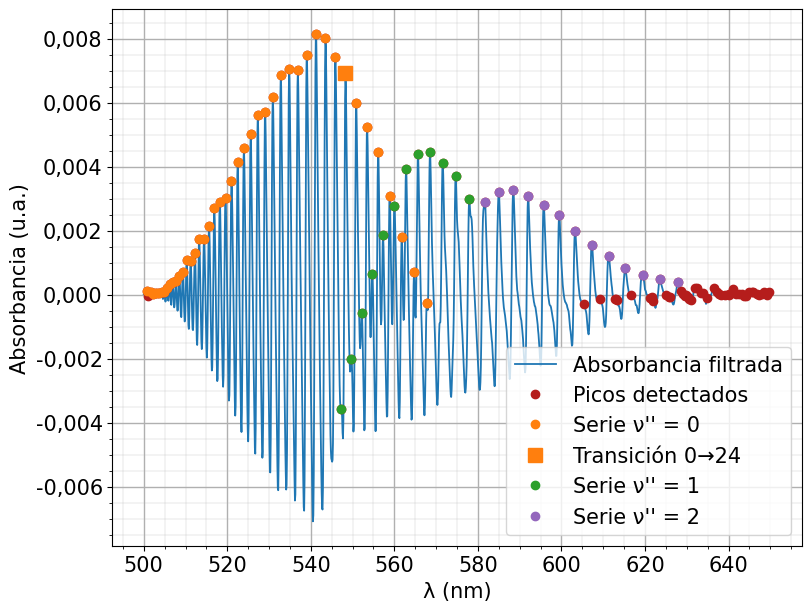


--- Arrays guardados con ν' asignados ---
serie0.shape = (45, 3)
serie1.shape = (12, 3)
serie2.shape = (13, 3)

Serie ν = 0:
 [[ 24.         548.3          2.26124746]
 [ 25.         500.7          2.47621726]
 [ 26.         501.7          2.47128161]
 [ 27.         502.2          2.46882115]
 [ 28.         502.7          2.46636559]
 [ 29.         503.2          2.46391491]
 [ 30.         503.7          2.4614691 ]
 [ 31.         504.3          2.45854052]
 [ 32.         504.9          2.4556189 ]
 [ 33.         505.6          2.45221911]
 [ 34.         506.2          2.44931249]
 [ 35.         506.9          2.44593013]
 [ 36.         507.7          2.442076  ]
 [ 37.         508.5          2.43823399]
 [ 38.         509.4          2.43392616]
 [ 39.         510.3          2.42963352]
 [ 40.         511.2          2.42535599]
 [ 41.         512.3          2.42014832]
 [ 42.         513.3          2.41543344]
 [ 43.         514.4          2.41026824]
 [ 44.         515.6          2.4

In [22]:


# === FILTRO PASA ALTOS BUTTERWORTH ===
orden = 3
Wn = 0.05
b, a = butter(orden, Wn, btype='high')
A_filtrada = filtfilt(b, a, A)

# === DETECCIÓN DE PICOS ===
peaks, _ = find_peaks(A_filtrada, prominence=0.00001)
lambda_peaks = Lambda_T[peaks]
A_peaks = A_filtrada[peaks]

# === ORDENAR PICOS POR λ CRECIENTE ===
sorted_idx = np.argsort(lambda_peaks)
peaks_sorted = peaks[sorted_idx]
lambda_peaks_sorted = Lambda_T[peaks_sorted]
A_peaks_sorted = A_filtrada[peaks_sorted]

# --- IMPRIMIR TODOS LOS PICOS DETECTADOS ---
print("=== TODOS LOS PICOS DETECTADOS (orden λ creciente) ===")
for i, p in enumerate(peaks_sorted):
    print(f"General {i:2d} | λ = {Lambda_T[p]:.2f} nm, A = {A_filtrada[p]:.5f}")

# === SERIE ν = 0 ===
lambda_target = 548.33
idx_target = (np.abs(Lambda_T[peaks_sorted] - lambda_target)).argmin()
pk_target = peaks_sorted[idx_target]

series_peaks_lower = [pk_target]
series_peaks_upper = [p for p in peaks_sorted if Lambda_T[p] < Lambda_T[pk_target] and A_filtrada[p] > 0]

lambda_extra = np.array([550.90, 553.50, 556.10, 558.90, 561.80, 564.70, 567.80])
series_peaks_extra = []
for l in lambda_extra:
    idx = np.argmin(np.abs(Lambda_T - l))
    if A_filtrada[idx] > 0 or l == 567.80:
        series_peaks_extra.append(idx)

nu_doble = np.full(len(Lambda_T), np.nan)
for i, p in enumerate(series_peaks_lower):
    nu_doble[p] = 24
for i, p in enumerate(series_peaks_upper):
    nu_doble[p] = 25 + i
for i, p in enumerate(series_peaks_extra):
    nu_doble[p] = 23 - i

series_indices_0 = series_peaks_lower + series_peaks_upper + series_peaks_extra
lambda_series0 = Lambda_T[series_indices_0]
A_series0 = A_filtrada[series_indices_0]
E_series0 = 1239.841984 / lambda_series0
n_general_series0 = np.array([np.where(peaks_sorted == p)[0][0] for p in series_indices_0])

print("\n=== Serie ν = 0 (ν'' asignados) ===")
for ng, nu, lam, E, A_val in zip(n_general_series0, nu_doble[series_indices_0],
                                 lambda_series0, E_series0, A_series0):
    print(f"General {ng:2d} | ν'' = {int(nu)} | λ = {lam:.2f} nm, E = {E:.4f} eV, A = {A_val:.5f}")

# === SERIE ν = 1 (ya identificada previamente, entre 540 y 578 nm) ===
series1_candidates = [
    p for p in peaks_sorted
    if (540 <= Lambda_T[p] <= 578)
    and (p not in series_indices_0)
]
lambda_series1 = Lambda_T[series1_candidates]
A_series1 = A_filtrada[series1_candidates]
E_series1 = 1239.841984 / lambda_series1

print("\n=== Serie ν = 1 (540–578 nm, no asignados a ν=0) ===")
for i, (lam, A_val, E) in enumerate(zip(lambda_series1, A_series1, E_series1)):
    ng = np.where(peaks_sorted == series1_candidates[i])[0][0]
    print(f"General {ng:2d} | λ = {lam:.2f} nm, E = {E:.4f} eV, A = {A_val:.5f}")

# === SERIE ν = 2 (λ ≥ 580 nm, A > 0, no asignados a ν=0 ni ν=1) ===
lambda_min_nu2 = 580
series2_candidates = [
    p for p in peaks_sorted
    if (Lambda_T[p] >= lambda_min_nu2)
    and (p not in series_indices_0)
    and (p not in series1_candidates)
    and (A_filtrada[p] > 0.0003)
]

lambda_series2 = Lambda_T[series2_candidates]
A_series2 = A_filtrada[series2_candidates]
E_series2 = 1239.841984 / lambda_series2

print("\n=== Serie ν = 2 (λ ≥ 580 nm, A > 0, no asignados a ν=0 ni ν=1) ===")
for i, (lam, A_val, E) in enumerate(zip(lambda_series2, A_series2, E_series2)):
    ng = np.where(peaks_sorted == series2_candidates[i])[0][0]
    print(f"General {ng:2d} | λ = {lam:.2f} nm, E = {E:.4f} eV, A = {A_val:.5f}")

# --- GRÁFICO ---
#%% === CREAR FIGURA Y GRAFICAR ===
fig, ax1 = plt.subplots(figsize=(8, 6), constrained_layout=True)

# Curva principal filtrada
ax1.plot(Lambda_T, A_filtrada, color='#1f77b4',  label="Absorbancia filtrada", linewidth=1.3)

# Picos y series
ax1.plot(lambda_peaks_sorted, A_peaks_sorted, marker = 'o', color = '#b51d1c', label="Picos detectados", linestyle = 'None')
ax1.plot(lambda_series0, A_series0, color = '#ff7f0e', marker = 'o', linestyle = 'None', label="Serie ν'' = 0", markersize=6)
# Etiqueta de transición 0→24
ax1.plot(Lambda_T[pk_target], A_filtrada[pk_target], color = '#ff7f0e', marker = 's', linestyle = 'None', markersize=10, label="Transición 0→24")
ax1.plot(lambda_series1, A_series1, color = '#2ca02c', marker = 'o', linestyle = 'None', label="Serie ν'' = 1", markersize=6)
ax1.plot(lambda_series2, A_series2, color ='#9467bd',  marker = 'o', linestyle = 'None', label="Serie ν'' = 2", markersize=6)




# === FORMATO DE EJES ===
ax1.set_xlabel("λ (nm)")
ax1.set_ylabel("Absorbancia (u.a.)")
#ax1.set_title("Absorbancia I₂ – Series ν'' = 0, 1 y 2")

# Eje Y con coma decimal y 3 decimales
ax1.yaxis.set_major_formatter(
    mtick.FuncFormatter(lambda x, pos: f"{x:.3f}".replace('.', ','))
)

# Cuadrícula con líneas mayores y menores
ax1.grid(which="major", linewidth=1)
ax1.grid(which="minor", linewidth=0.2)
ax1.minorticks_on()

# Leyenda y ajuste
# Leyenda en la parte inferior derecha con recuadro
ax1.legend(loc='lower right', frameon=True)
plt.autoscale(enable=True, axis='y', tight=False)

# Guardar figura (ruta según tu estructura)
plt.savefig(os.path.join(base_dir, "Absorbancia_I2_series.png"),
            dpi=350, transparent=True)

plt.show()
# === GUARDAR DATOS DE CADA SERIE CON ν' asignados ===

# === GUARDAR DATOS DE CADA SERIE CON ν' bien asignados ===

# Serie ν = 0: tomamos los nu_doble tal como los asignaste en la serie 0
nu_prim0 = []
for p in series_indices_0:
    # Si el valor en nu_doble es nan (por si acaso), asignar según regla:
    if np.isnan(nu_doble[p]):
        # Ejemplo: si p estaba en series_peaks_lower → 24
        if p in series_peaks_lower:
            nu_prim0.append(24)
        elif p in series_peaks_upper:
            nu_prim0.append(25 + series_peaks_upper.index(p))
        elif p in series_peaks_extra:
            nu_prim0.append(23 - series_peaks_extra.index(p))
    else:
        nu_prim0.append(nu_doble[p])
nu_prim0 = np.array(nu_prim0)

serie0 = np.column_stack([
    nu_prim0,
    lambda_series0,
    E_series0
])

# Serie ν = 1
nu_prim1 = np.full(len(lambda_series1), 1)
serie1 = np.column_stack([
    nu_prim1,
    lambda_series1,
    E_series1
])

# Serie ν = 2
nu_prim2 = np.full(len(lambda_series2), 2)
serie2 = np.column_stack([
    nu_prim2,
    lambda_series2,
    E_series2
])


# --- Resumen ---
print("\n--- Arrays guardados con ν' asignados ---")
print("serie0.shape =", serie0.shape)
print("serie1.shape =", serie1.shape)
print("serie2.shape =", serie2.shape)

# Verificación opcional
print("\nSerie ν = 0:\n", serie0)
print("\nSerie ν = 1:\n", serie1)
print("\nSerie ν = 2:\n", serie2)



## nu 0 ordenada

[ 17.         567.8          2.18358926]
[ 18.         564.7          2.19557638]
[ 19.        561.8         2.2069099]
[ 20.         558.9          2.21836104]
[ 21.         556.1          2.22953063]
[ 22.         553.5          2.24000358]
[ 23.         550.9          2.25057539]
[ 24.         548.3          2.26124746]
[ 25.         545.9          2.27118883]
[ 26.       543.5        2.281218]
[ 27.         541.2          2.29091276]
[ 28.         539.           2.30026342]
[ 29.         536.9          2.30926054]
[ 30.         534.8          2.31832832]
[ 31.         532.8          2.32703075]
[ 32.         530.9          2.33535879]
[ 33.         529.1          2.34330369]
[ 34.         527.3          2.35130283]
[ 35.         525.6          2.35890788]
[ 36.         524.           2.36611066]
[ 37.         522.5          2.37290332]
[ 38.         521.           2.37973509]
[ 39.         519.6          2.38614701]
[ 40.         518.2          2.39259356]
[ 41.         516.9      

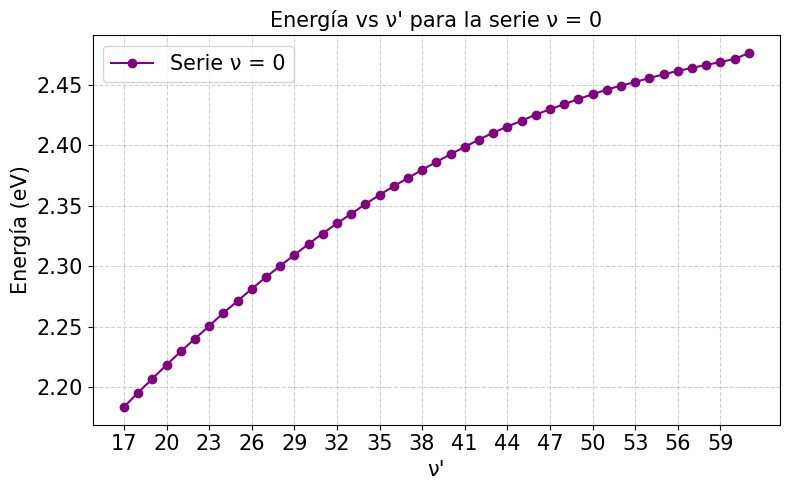

In [5]:
# Copiar serie0
serie0_corregida = serie0.copy()

# Encontrar índices donde nu' está entre 25 y 61
mask = (serie0_corregida[:,0] >= 25) & (serie0_corregida[:,0] <= 61)
indices = np.where(mask)[0]

# Invertir solo los nu' de esos índices
nu_invertidos = serie0_corregida[indices,0][::-1]

# Reasignar
serie0_corregida[indices,0] = nu_invertidos

# Ordenar por nu' creciente
sort_idx = np.argsort(serie0_corregida[:,0])
serie0_ordenada = serie0_corregida[sort_idx]

# Verificar
for row in serie0_ordenada:
    print(row)


# Extraer columnas
nu_plot = serie0_ordenada[:,0]
E_plot = serie0_ordenada[:,2]

# Gráfico
plt.figure(figsize=(8,5))
plt.plot(nu_plot, E_plot, 'o-', color='purple', markersize=6, label="Serie ν = 0")
plt.xlabel("ν'")
plt.ylabel("Energía (eV)")
plt.title("Energía vs ν' para la serie ν = 0")
plt.grid(True, linestyle='--', alpha=0.6)

# Marcas en el eje x cada 3 nu'
plt.xticks(np.arange(int(nu_plot.min()), int(nu_plot.max())+1, 3))

plt.tight_layout()
plt.legend()
plt.show()



## nu 1 ordenada

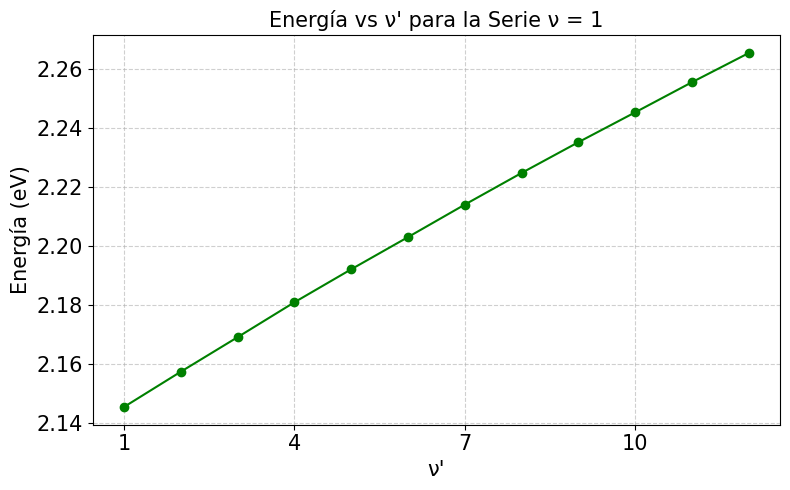

[[  1.         577.9          2.14542652]
 [  2.         574.7          2.15737251]
 [  3.         571.6          2.16907275]
 [  4.         568.5          2.18090059]
 [  5.         565.6          2.19208272]
 [  6.         562.8          2.2029886 ]
 [  7.         560.           2.21400354]
 [  8.         557.3          2.22472992]
 [  9.         554.7          2.23515771]
 [ 10.         552.2          2.24527704]
 [ 11.         549.7          2.25548842]
 [ 12.         547.3          2.2653791 ]]


In [6]:


# --- Serie ν = 1 ordenada según λ decreciente ---
# Ejemplo de serie1 ya cargada
# serie1 = np.array([[nu', lambda, E], ...])

# Ordenar λ decreciente
sort_idx = np.argsort(serie1[:,1])[::-1]
serie1_sorted = serie1[sort_idx]

# Asignar nu' crecientes empezando por 1
serie1_sorted[:,0] = np.arange(1, len(serie1_sorted)+1)

# Calcular energía en eV a partir de λ (nm)
serie1_sorted[:,2] = 1239.841984 / serie1_sorted[:,1]

# --- Plot ---
plt.figure(figsize=(8,5))
plt.plot(serie1_sorted[:,0], serie1_sorted[:,2], 'o-', color='green', markersize=6)
plt.xlabel("ν'")
plt.ylabel("Energía (eV)")
plt.title("Energía vs ν' para la Serie ν = 1")
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(np.arange(1, int(serie1_sorted[:,0].max())+1, 3))  # ticks cada 3 unidades
plt.tight_layout()
plt.show()
print(serie1_sorted)


## nu 2 ordenada

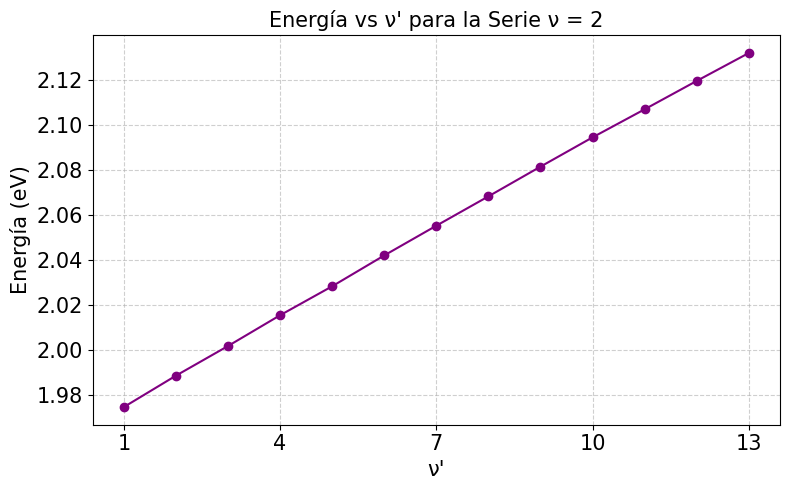

In [7]:


# --- Serie ν = 2 ---
# Ejemplo de serie2 cargada como array: [nu'', lambda, E]
# serie2 = np.array([...])

# Ordenar λ decreciente
sort_idx = np.argsort(serie2[:,1])[::-1]
serie2_sorted = serie2[sort_idx]

# Asignar nu' crecientes empezando por 1
serie2_sorted[:,0] = np.arange(1, len(serie2_sorted)+1)

# Calcular energía en eV a partir de λ (nm)
serie2_sorted[:,2] = 1239.841984 / serie2_sorted[:,1]

# --- Plot ---
plt.figure(figsize=(8,5))
plt.plot(serie2_sorted[:,0], serie2_sorted[:,2], 'o-', color='purple', markersize=6)
plt.xlabel("ν'")
plt.ylabel("Energía (eV)")
plt.title("Energía vs ν' para la Serie ν = 2")
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(np.arange(1, int(serie2_sorted[:,0].max())+1, 3))  # ticks cada 3 unidades
plt.tight_layout()
plt.show()


## todas juntos

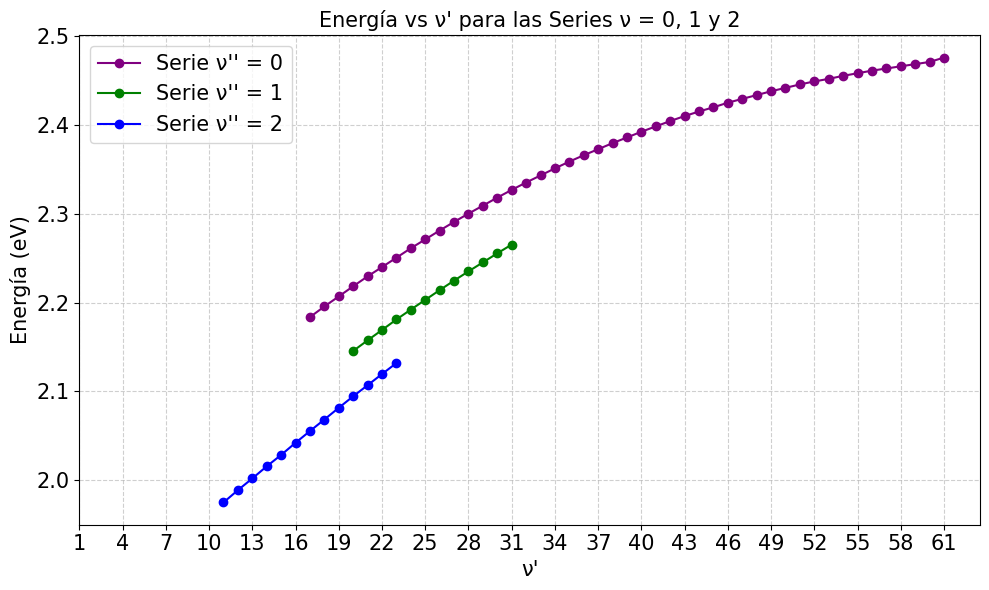

In [8]:


# --- Serie ν = 0 ya corregida ---
nu0 = serie0_ordenada[:,0]
E0 = serie0_ordenada[:,2]

# --- Serie ν = 1 ---
nu1 = serie1_sorted[:,0]+19
E1 = serie1_sorted[:,2]

# --- Serie ν = 2 ---
nu2 = serie2_sorted[:,0]+10
E2 = serie2_sorted[:,2]

# --- Plot de las tres series juntas ---
plt.figure(figsize=(10,6))

plt.plot(nu0, E0, 'o-', color='purple', markersize=6, label="Serie ν'' = 0")
plt.plot(nu1, E1, 'o-', color='green', markersize=6, label="Serie ν'' = 1")
plt.plot(nu2, E2, 'o-', color='blue', markersize=6, label="Serie ν'' = 2")

plt.xlabel("ν'")
plt.ylabel("Energía (eV)")
plt.title("Energía vs ν' para las Series ν = 0, 1 y 2")
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()

# Ticks de nu' cada 3 unidades, considerando el rango máximo entre las tres series
nu_max = int(max(nu0.max(), nu1.max(), nu2.max()))
plt.xticks(np.arange(1, nu_max+1, 3))

plt.tight_layout()
plt.show()





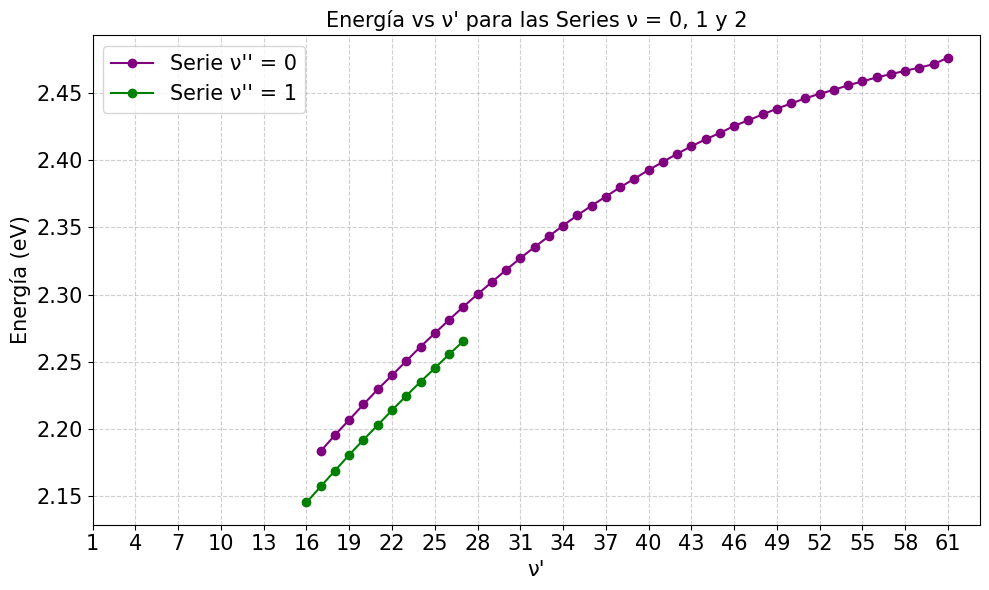

ν'=17.0: ΔE = E(ν''=1) - E(ν''=0) = -0.0262 eV
ν'=18.0: ΔE = E(ν''=1) - E(ν''=0) = -0.0265 eV
ν'=19.0: ΔE = E(ν''=1) - E(ν''=0) = -0.0260 eV
ν'=20.0: ΔE = E(ν''=1) - E(ν''=0) = -0.0263 eV
ν'=21.0: ΔE = E(ν''=1) - E(ν''=0) = -0.0265 eV
ν'=22.0: ΔE = E(ν''=1) - E(ν''=0) = -0.0260 eV
ν'=23.0: ΔE = E(ν''=1) - E(ν''=0) = -0.0258 eV
ν'=24.0: ΔE = E(ν''=1) - E(ν''=0) = -0.0261 eV
ν'=25.0: ΔE = E(ν''=1) - E(ν''=0) = -0.0259 eV
ν'=26.0: ΔE = E(ν''=1) - E(ν''=0) = -0.0257 eV
ν'=27.0: ΔE = E(ν''=1) - E(ν''=0) = -0.0255 eV
Desviación estándar de ΔE entre Serie ν''=1 y Serie ν''=0: 0.0003 eV


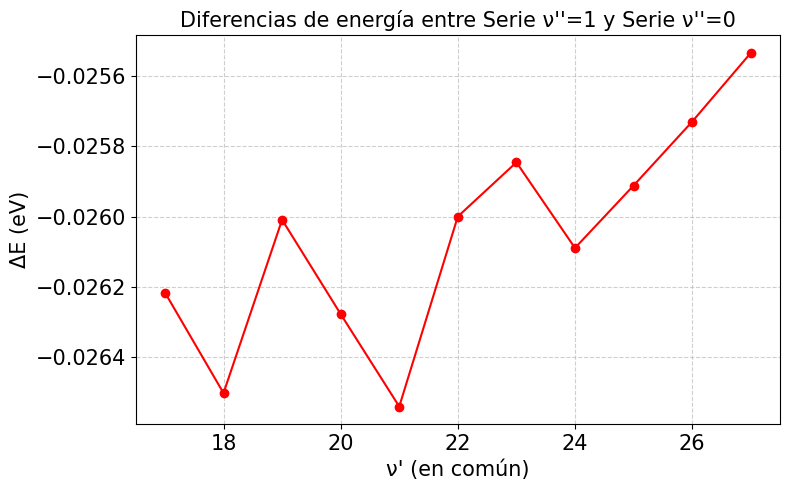

In [9]:


# --- Serie ν = 0 ya corregida ---
nu0 = serie0_ordenada[:,0]
E0 = serie0_ordenada[:,2]

# --- Serie ν = 1 ---
nu1 = serie1_sorted[:,0]+15
E1 = serie1_sorted[:,2]



# --- Plot de las tres series juntas ---
plt.figure(figsize=(10,6))

plt.plot(nu0, E0, 'o-', color='purple', markersize=6, label="Serie ν'' = 0")
plt.plot(nu1, E1, 'o-', color='green', markersize=6, label="Serie ν'' = 1")


plt.xlabel("ν'")
plt.ylabel("Energía (eV)")
plt.title("Energía vs ν' para las Series ν = 0, 1 y 2")
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()

# Ticks de nu' cada 3 unidades, considerando el rango máximo entre las tres series
nu_max = int(max(nu0.max(), nu1.max(), nu2.max()))
plt.xticks(np.arange(1, nu_max+1, 3))

plt.tight_layout()
plt.show()



# --- Encontrar los nu' en común ---
nu_comun_01 = np.intersect1d(nu0, nu1)

# --- Inicializar arrays de diferencias ---
delta_E01 = []

# --- Calcular diferencias de energía para cada nu' en común ---
for nu_val in nu_comun_01:
    E0_val = E0[nu0 == nu_val][0]  # energía serie 0
    E1_val = E1[nu1 == nu_val][0]  # energía serie 1
    delta_E01.append(E1_val - E0_val)

delta_E01 = np.array(delta_E01)

# --- Mostrar resultados ---
for i, nu_val in enumerate(nu_comun_01):
    print(f"ν'={nu_val}: ΔE = E(ν''=1) - E(ν''=0) = {delta_E01[i]:.4f} eV")

# Desviación estándar de las diferencias de energía
std_delta_E01 = np.std(delta_E01)

print(f"Desviación estándar de ΔE entre Serie ν''=1 y Serie ν''=0: {std_delta_E01:.4f} eV")


plt.figure(figsize=(8,5))
plt.plot(nu_comun_01, delta_E01, 'o-', color='red', markersize=6)
plt.xlabel("ν' (en común)")
plt.ylabel("ΔE (eV)")
plt.title("Diferencias de energía entre Serie ν''=1 y Serie ν''=0")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()



## automnatizacion corrimiento

### nu 1

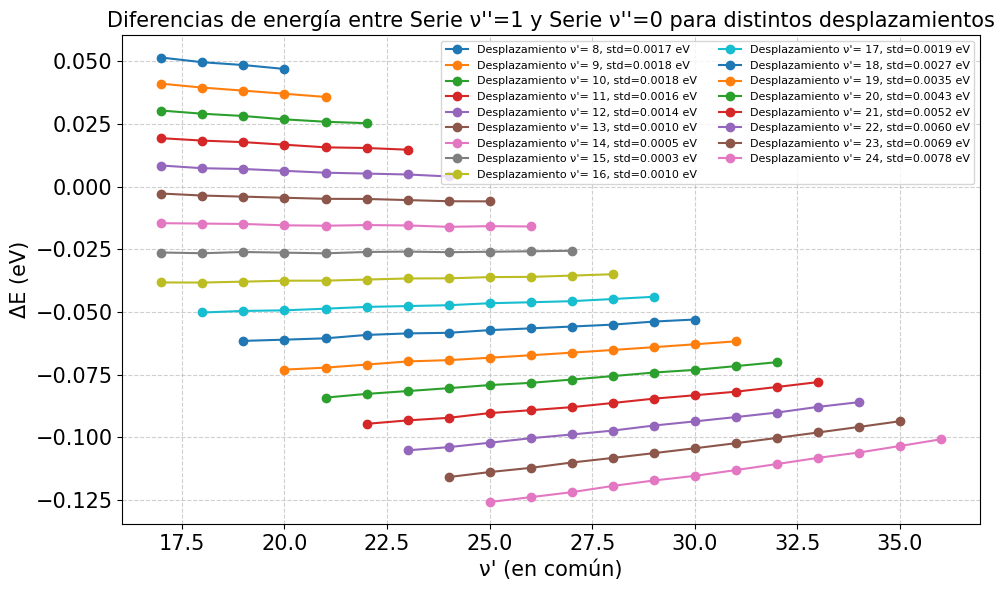

Desplazamiento ν'= 8: desviación estándar ΔE = 0.0017 eV
Desplazamiento ν'= 9: desviación estándar ΔE = 0.0018 eV
Desplazamiento ν'= 10: desviación estándar ΔE = 0.0018 eV
Desplazamiento ν'= 11: desviación estándar ΔE = 0.0016 eV
Desplazamiento ν'= 12: desviación estándar ΔE = 0.0014 eV
Desplazamiento ν'= 13: desviación estándar ΔE = 0.0010 eV
Desplazamiento ν'= 14: desviación estándar ΔE = 0.0005 eV
Desplazamiento ν'= 15: desviación estándar ΔE = 0.0003 eV
Desplazamiento ν'= 16: desviación estándar ΔE = 0.0010 eV
Desplazamiento ν'= 17: desviación estándar ΔE = 0.0019 eV
Desplazamiento ν'= 18: desviación estándar ΔE = 0.0027 eV
Desplazamiento ν'= 19: desviación estándar ΔE = 0.0035 eV
Desplazamiento ν'= 20: desviación estándar ΔE = 0.0043 eV
Desplazamiento ν'= 21: desviación estándar ΔE = 0.0052 eV
Desplazamiento ν'= 22: desviación estándar ΔE = 0.0060 eV
Desplazamiento ν'= 23: desviación estándar ΔE = 0.0069 eV
Desplazamiento ν'= 24: desviación estándar ΔE = 0.0078 eV
minimo std: 0.00

In [10]:
#iteracion 2


# --- Serie ν = 0 ya corregida ---
nu0 = serie0_ordenada[:,0]
E0 = serie0_ordenada[:,2]

# --- Serie ν = 1 ---
nu1_base = serie1_sorted[:,0]
E1 = serie1_sorted[:,2]

# Rango de desplazamientos a probar
desplazamientos = np.arange(8, 25, 1)  # 20,21,...,30

# Para almacenar desviaciones estándar de cada desplazamiento
stds = []

plt.figure(figsize=(10,6))

for d in desplazamientos:
    nu1_shifted = nu1_base + d
    
    # Encontrar los nu' en común con la serie 0
    nu_comun = np.intersect1d(nu0, nu1_shifted)
    
    # Calcular diferencias de energía
    delta_E = np.array([E1[nu1_shifted == nu_val][0] - E0[nu0 == nu_val][0] for nu_val in nu_comun])
    
    # Desviación estándar
    std = np.std(delta_E)
    stds.append(std)
    
    # Graficar las diferencias
    plt.plot(nu_comun, delta_E, 'o-', markersize=6, label=f"Desplazamiento ν'= {d}, std={std:.4f} eV")

plt.xlabel("ν' (en común)")
plt.ylabel("ΔE (eV)")
plt.title("Diferencias de energía entre Serie ν''=1 y Serie ν''=0 para distintos desplazamientos")
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=8, ncol=2)
plt.tight_layout()
plt.show()

# Mostrar desviaciones estándar
for d, s in zip(desplazamientos, stds):
    print(f"Desplazamiento ν'= {d}: desviación estándar ΔE = {s:.4f} eV")

minstd = min(stds)
indice = stds.index(minstd)
desplopt = desplazamientos[indice]
print(f"minimo std: {minstd}, desplazamiento optimo: {desplopt}")


### nu2

c:\Users\elisa\miniconda3\Lib\site-packages\numpy\_core\_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\elisa\miniconda3\Lib\site-packages\numpy\_core\_methods.py:180: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
c:\Users\elisa\miniconda3\Lib\site-packages\numpy\_core\_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


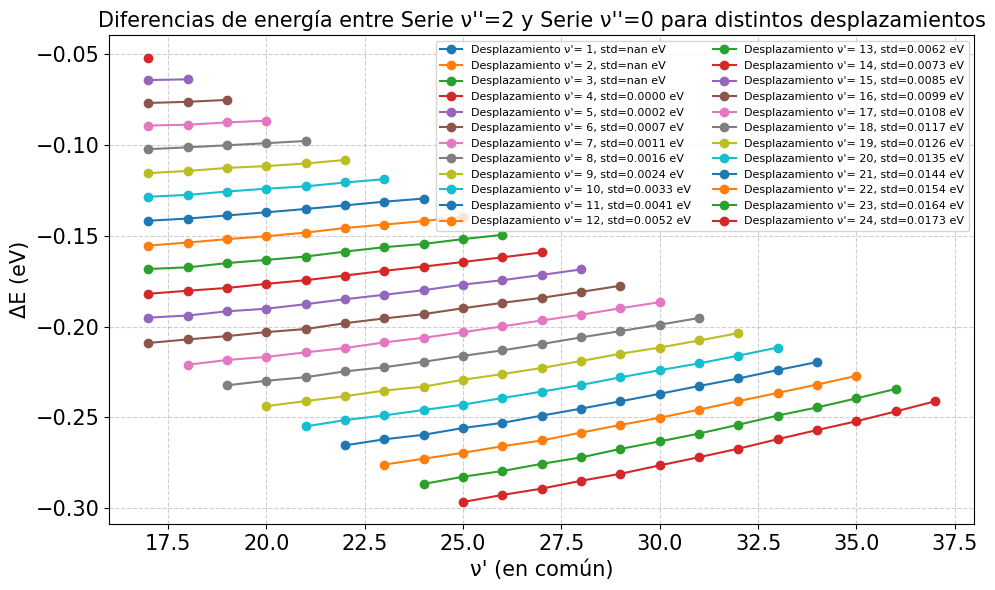

Desplazamiento ν'= 1: desviación estándar ΔE = nan eV
Desplazamiento ν'= 2: desviación estándar ΔE = nan eV
Desplazamiento ν'= 3: desviación estándar ΔE = nan eV
Desplazamiento ν'= 4: desviación estándar ΔE = 0.0000 eV
Desplazamiento ν'= 5: desviación estándar ΔE = 0.0002 eV
Desplazamiento ν'= 6: desviación estándar ΔE = 0.0007 eV
Desplazamiento ν'= 7: desviación estándar ΔE = 0.0011 eV
Desplazamiento ν'= 8: desviación estándar ΔE = 0.0016 eV
Desplazamiento ν'= 9: desviación estándar ΔE = 0.0024 eV
Desplazamiento ν'= 10: desviación estándar ΔE = 0.0033 eV
Desplazamiento ν'= 11: desviación estándar ΔE = 0.0041 eV
Desplazamiento ν'= 12: desviación estándar ΔE = 0.0052 eV
Desplazamiento ν'= 13: desviación estándar ΔE = 0.0062 eV
Desplazamiento ν'= 14: desviación estándar ΔE = 0.0073 eV
Desplazamiento ν'= 15: desviación estándar ΔE = 0.0085 eV
Desplazamiento ν'= 16: desviación estándar ΔE = 0.0099 eV
Desplazamiento ν'= 17: desviación estándar ΔE = 0.0108 eV
Desplazamiento ν'= 18: desviació

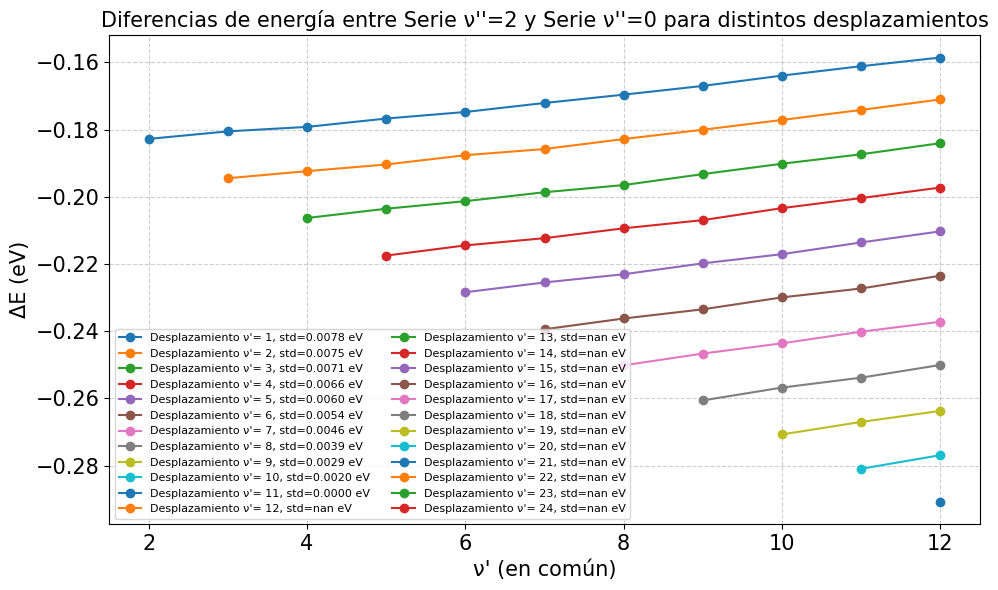

Desplazamiento ν'= 1: desviación estándar ΔE = 0.0078 eV
Desplazamiento ν'= 2: desviación estándar ΔE = 0.0075 eV
Desplazamiento ν'= 3: desviación estándar ΔE = 0.0071 eV
Desplazamiento ν'= 4: desviación estándar ΔE = 0.0066 eV
Desplazamiento ν'= 5: desviación estándar ΔE = 0.0060 eV
Desplazamiento ν'= 6: desviación estándar ΔE = 0.0054 eV
Desplazamiento ν'= 7: desviación estándar ΔE = 0.0046 eV
Desplazamiento ν'= 8: desviación estándar ΔE = 0.0039 eV
Desplazamiento ν'= 9: desviación estándar ΔE = 0.0029 eV
Desplazamiento ν'= 10: desviación estándar ΔE = 0.0020 eV
Desplazamiento ν'= 11: desviación estándar ΔE = 0.0000 eV
Desplazamiento ν'= 12: desviación estándar ΔE = nan eV
Desplazamiento ν'= 13: desviación estándar ΔE = nan eV
Desplazamiento ν'= 14: desviación estándar ΔE = nan eV
Desplazamiento ν'= 15: desviación estándar ΔE = nan eV
Desplazamiento ν'= 16: desviación estándar ΔE = nan eV
Desplazamiento ν'= 17: desviación estándar ΔE = nan eV
Desplazamiento ν'= 18: desviación estánda

In [23]:
#iteracion 2
#iteracion 2


# --- Serie ν = 1 ya corregida ---
nu0 = serie0_ordenada[:,0]
E0 = serie0_ordenada[:,2]

# --- Serie ν = 2 ---
nu1_base = serie2_sorted[:,0]
E1 = serie2_sorted[:,2]

# Rango de desplazamientos a probar
desplazamientos = np.arange(1, 25, 1)  # 20,21,...,30

# Para almacenar desviaciones estándar de cada desplazamiento
stds = []

plt.figure(figsize=(10,6))

for d in desplazamientos:
    nu1_shifted = nu1_base + d
    
    # Encontrar los nu' en común con la serie 0
    nu_comun = np.intersect1d(nu0, nu1_shifted)
    
    # Calcular diferencias de energía
    delta_E = np.array([E1[nu1_shifted == nu_val][0] - E0[nu0 == nu_val][0] for nu_val in nu_comun])
    
    # Desviación estándar
    std = np.std(delta_E)
    stds.append(std)
    
    # Graficar las diferencias
    plt.plot(nu_comun, delta_E, 'o-', markersize=6, label=f"Desplazamiento ν'= {d}, std={std:.4f} eV")

plt.xlabel("ν' (en común)")
plt.ylabel("ΔE (eV)")
plt.title("Diferencias de energía entre Serie ν''=2 y Serie ν''=0 para distintos desplazamientos")
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=8, ncol=2)
plt.tight_layout()
plt.show()

# Mostrar desviaciones estándar
for d, s in zip(desplazamientos, stds):
    print(f"Desplazamiento ν'= {d}: desviación estándar ΔE = {s:.4f} eV")

minstd = min(stds)
indice = stds.index(minstd)
desplopt = desplazamientos[indice]
print(f"minimo std: {minstd}, desplazamiento optimo: {desplopt}")

# --- Serie ν = 1 ya corregida ---
nu0 = serie1_sorted[:,0]
E0 = serie1_sorted[:,2]

# --- Serie ν = 2 ---
nu1_base = serie2_sorted[:,0]
E1 = serie2_sorted[:,2]

# Rango de desplazamientos a probar
desplazamientos = np.arange(1, 25, 1)  # 20,21,...,30

# Para almacenar desviaciones estándar de cada desplazamiento
stds = []

plt.figure(figsize=(10,6))

for d in desplazamientos:
    nu1_shifted = nu1_base + d
    
    # Encontrar los nu' en común con la serie 0
    nu_comun = np.intersect1d(nu0, nu1_shifted)
    
    # Calcular diferencias de energía
    delta_E = np.array([E1[nu1_shifted == nu_val][0] - E0[nu0 == nu_val][0] for nu_val in nu_comun])
    
    # Desviación estándar
    std = np.std(delta_E)
    stds.append(std)
    
    # Graficar las diferencias
    plt.plot(nu_comun, delta_E, 'o-', markersize=6, label=f"Desplazamiento ν'= {d}, std={std:.4f} eV")

plt.xlabel("ν' (en común)")
plt.ylabel("ΔE (eV)")
plt.title("Diferencias de energía entre Serie ν''=2 y Serie ν''=0 para distintos desplazamientos")
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=8, ncol=2)
plt.tight_layout()
plt.show()

# Mostrar desviaciones estándar
for d, s in zip(desplazamientos, stds):
    print(f"Desplazamiento ν'= {d}: desviación estándar ΔE = {s:.4f} eV")

minstd = min(stds)
indice = stds.index(minstd)
desplopt = desplazamientos[indice]
print(f"minimo std: {minstd}, desplazamiento optimo: {desplopt}")


## ya desplazada lista para fit


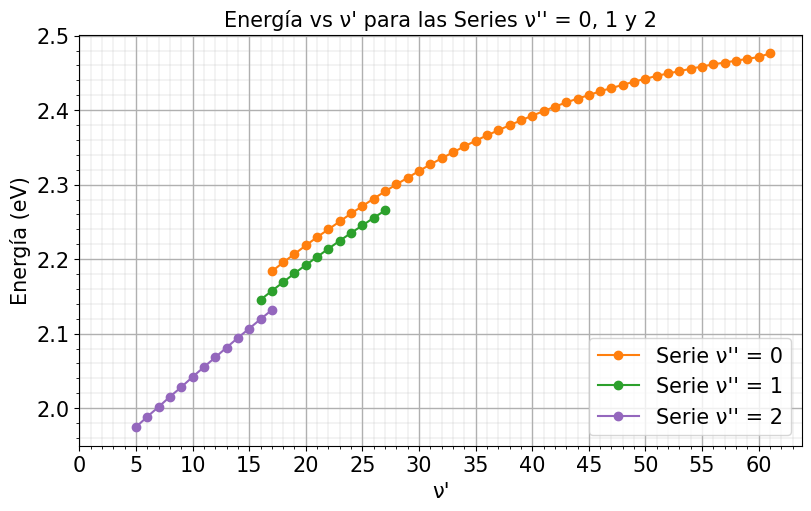

In [27]:


# --- Serie ν = 0 ya corregida ---
nu0 = serie0_ordenada[:,0]
E0 = serie0_ordenada[:,2]

# --- Serie ν = 1 ---
nu1 = serie1_sorted[:,0]+15
E1 = serie1_sorted[:,2]

# --- Serie ν = 2 ---
nu2 = serie2_sorted[:,0]+4
E2 = serie2_sorted[:,2]

# --- Plot de las tres series juntas ---
#%% Celda para crear figura
fig, ax1 = plt.subplots(figsize=(8,5), constrained_layout=True)
# --- Plot de las tres series ---
ax1.plot(nu0, E0, 'o-', color='#ff7f0e', markersize=6, label="Serie ν'' = 0")
ax1.plot(nu1, E1, 'o-', color='#2ca02c', markersize=6, label="Serie ν'' = 1")
ax1.plot(nu2, E2, 'o-', color='#9467bd', markersize=6, label="Serie ν'' = 2")

# Etiquetas y título
ax1.set_xlabel("ν'")
ax1.set_ylabel("Energía (eV)")
ax1.set_title("Energía vs ν' para las Series ν'' = 0, 1 y 2")

# Cuadrícula con líneas mayores y menores
ax1.grid(which="major", linewidth=1)
ax1.grid(which="minor", linewidth=0.2)
ax1.minorticks_on()

# Leyenda
ax1.legend(loc='lower right', frameon=True)

# Ticks de nu' cada 5 unidades considerando el rango máximo
nu_max = int(max(nu0.max(), nu1.max(), nu2.max()))
ax1.set_xticks(np.arange(0, nu_max+1, 5))

# Guardar figura
plt.savefig(os.path.join(base_dir, "E_vs_nu.png"),
            dpi=350, transparent=True)
plt.show()




## fit


=== Ajuste ν'' = 0 ===
a = -1.198e-04 ± 1.0e-06
b = 1.599e-02 ± 8.3e-05
c = 1.941e+00 ± 1.5e-03
R² = 0.99986

=== Ajuste ν'' = 1 ===
a = -1.062e-04 ± 3.0e-06
b = 1.557e-02 ± 1.3e-04
c = 1.917e+00 ± 1.4e-03
R² = 0.99999

=== Ajuste ν'' = 2 ===
a = -5.069e-05 ± 5.0e-06
b = 1.428e-02 ± 1.2e-04
c = 1.898e+00 ± 6.2e-04
R² = 0.99998


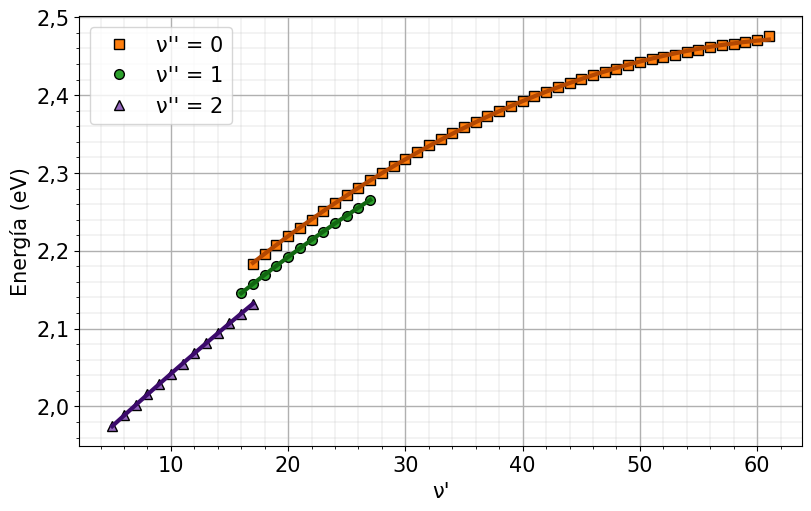


--- Referencias nu'---
ω' = 128 cm^-1 = 2.411e+13 rad/s
ω' = 129.8 cm^-1 = 2.445e+13 rad/s
χ'·ω' = 0.834 cm^-1 --> 1.571e+11 rad/s
χ'·ω' = 0.985 cm^-1 --> 1.855e+11 rad/s

--- Referencias nu''---
ω'' = 214.8 cm^-1 = 4.046e+13 rad/s
ω'' = 214.57 cm^-1 = 4.042e+13 rad/s
χ''·ω'' = 0.71 cm^-1 --> 1.337e+11 rad/s
χ''·ω'' = 0.6123 cm^-1 --> 1.153e+11 rad/s
χ'' = 0.0033054003724394786 
χ'' = 0.002853614205154495
delta E = 15745.2 cm**-1 = 1.9521560010194436 eV
delta E2 = 15641.67 cm**-1 = 1.939319916956647 eV

--- Errores ω' y xω' ---
 Serie |   ω' (rad/s) ± |  xω' (rad/s) ±
--------------------------------------------------
 ν''=0 |    2.429e+13 ± 1.260e+11 |    1.820e+11 ± 1.577e+09
 ν''=1 |    2.365e+13 ± 1.980e+11 |    1.613e+11 ± 4.490e+09
 ν''=2 |    2.170e+13 ± 1.757e+11 |    7.701e+10 ± 7.562e+09
promedio |    2.321e+13 ± 1.348e+12 |    1.401e+11 ± 5.562e+10

--- Errores coeficientes sistema 3x3 ---
c1 = ΔE_el           = 1.954905e+00 ± 3.37e-03 eV
c2 = ħ·ω''           = 2.793608e-02

In [ ]:
def formato_coma_adaptativo(x, pos):
    """Formatea x con coma decimal y número de decimales adaptativo."""
    if abs(x) >= 10:
        s = f"{x:.0f}"
    elif abs(x) >= 1:
        s = f"{x:.1f}"
    else:
        s = f"{x:.2f}"
    return s.replace('.', ',')

def ajuste_cuadratico(x, y, label):
    # Reemplazar x por x + 1/2
    x_shifted = x + 0.5
    
    # Ajuste polinomial de grado 2 con matriz de covarianza
    coef, cov = np.polyfit(x_shifted, y, 2, cov=True)  # devuelve [a, b, c] y covarianza
    err = np.sqrt(np.diag(cov))  # errores estándar
    
    print(f'\n=== Ajuste {label} ===')
    print(f'a = {coef[0]:.3e} ± {err[0]:.1e}')
    print(f'b = {coef[1]:.3e} ± {err[1]:.1e}')
    print(f'c = {coef[2]:.3e} ± {err[2]:.1e}')
    

    
    # Calcular valores ajustados
    x_fit = np.linspace(min(x), max(x), 200)
    y_fit = np.polyval(coef, x_fit + 0.5)
    
    # Calcular R²
    y_pred = np.polyval(coef, x_shifted)
    ss_res = np.sum((y - y_pred)**2)
    ss_tot = np.sum((y - np.mean(y))**2)
    r2 = 1 - ss_res/ss_tot
    print(f'R² = {r2:.5f}')
    
    return x_fit, y_fit, coef, err, r2


#%% Celda para crear figura y graficar ajustes
fig, ax1 = plt.subplots(figsize=(8,5), constrained_layout=True)

# --- Serie ν = 0 ---
ax1.plot(nu0, E0, marker="s", color='#ff7f0e', linestyle='None',
         markeredgecolor='black', markersize=7, label='ν\'\' = 0')
x_fit1, y_fit1, coef1, err1, r21 = ajuste_cuadratico(nu0, E0, 'ν\'\' = 0')
ax1.plot(x_fit1, y_fit1, color='#b34700', linestyle='-', linewidth=3)

# --- Serie ν = 1 ---
ax1.plot(nu1, E1, marker="o", color='#2ca02c', linestyle='None',
         markeredgecolor='black', markersize=7, label='ν\'\' = 1')
x_fit2, y_fit2, coef2, err2, r22 = ajuste_cuadratico(nu1, E1, 'ν\'\' = 1')
ax1.plot(x_fit2, y_fit2, color='#116611', linestyle='-', linewidth=3)

# --- Serie ν = 2 ---
ax1.plot(nu2, E2, marker="^", color='#9467bd', linestyle='None',
         markeredgecolor='black', markersize=7, label='ν\'\' = 2')
x_fit3, y_fit3, coef3, err3, r23 = ajuste_cuadratico(nu2, E2, 'ν\'\' = 2')
ax1.plot(x_fit3, y_fit3, color='#3b0a6b', linestyle='-', linewidth=3)
plt.gca().xaxis.set_major_formatter(mtick.FuncFormatter(formato_coma_adaptativo))
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(formato_coma_adaptativo))
# Etiquetas y título
ax1.set_xlabel("ν'")
ax1.set_ylabel("Energía (eV)")
#ax1.set_title("Ajuste cuadrático de Energía vs ν'")

ax1.grid(which="major", linewidth=1)
ax1.grid(which="minor", linewidth=0.2)
ax1.minorticks_on()
ax1.legend(frameon=True)

plt.savefig(os.path.join(base_dir, "ajuste_E_vs_nu.png"), dpi=350, transparent=True)
plt.show()



hbar = 6.582119569e-16  # eV*s
c_cm_s = 2.99792458e10  # cm/s

# --- Coeficientes del ajuste ---
omega1 = coef1[1] / hbar
omega2 = coef2[1] / hbar
omega3 = coef3[1] / hbar

xomega1 = -coef1[0] / hbar
xomega2 = -coef2[0] / hbar
xomega3 = -coef3[0] / hbar

# ω' y x·ω' con error
omega1_err = err1[1] / hbar
omega2_err = err2[1] / hbar
omega3_err = err3[1] / hbar

xomega1_err = err1[0] / hbar
xomega2_err = err2[0] / hbar
xomega3_err = err3[0] / hbar



# --- Referencias ---
omega_ref_cm = 128         # ω' en cm^-1
chi_omega_ref_cm = 0.834  # χ'·ω' en cm^-1
omega_ref_cm2 = 129.8         # ω' en cm^-1
chi_omega_ref_cm2 = 0.985  # χ'·ω' en cm^-1
omegapp_ref = 214.8 #para el fundamental el prima prima
omegapp_ref2 = 214.57 
chi_omegapp_ref = 0.710
chi_omegapp_ref2 = 0.6123
deltaE_ref = 15745.2 
deltaE_ref2 = 15641.67

omega_ref_eV = 2 * np.pi * c_cm_s * omega_ref_cm 
chi_omega_ref_eV = 2 * np.pi * c_cm_s * chi_omega_ref_cm 
omega_ref_eV2 = 2 * np.pi * c_cm_s * omega_ref_cm2 
chi_omega_ref_eV2 = 2 * np.pi * c_cm_s * chi_omega_ref_cm2 
omegapp_ref_eV = 2 * np.pi * c_cm_s * omegapp_ref 
chi_omegapp_ref_eV = 2 * np.pi * c_cm_s * chi_omegapp_ref 
omegapp_ref_eV2 = 2 * np.pi * c_cm_s * omegapp_ref2 
chi_omegapp_ref_eV2 = 2 * np.pi * c_cm_s * chi_omegapp_ref2 
chipp_ref = chi_omegapp_ref_eV / omegapp_ref_eV
chipp_ref2 = chi_omegapp_ref_eV2 / omegapp_ref_eV2
deltaE_eV_ref = 2 * np.pi * c_cm_s *hbar *deltaE_ref
deltaE_eV_ref2 = 2 * np.pi * c_cm_s * hbar * deltaE_ref2


print("\n--- Referencias nu'---")
print(f"ω' = {omega_ref_cm} cm^-1 = {omega_ref_eV:.3e} rad/s")
print(f"ω' = {omega_ref_cm2} cm^-1 = {omega_ref_eV2:.3e} rad/s")
print(f"χ'·ω' = {chi_omega_ref_cm} cm^-1 --> {chi_omega_ref_eV:.3e} rad/s")
print(f"χ'·ω' = {chi_omega_ref_cm2} cm^-1 --> {chi_omega_ref_eV2:.3e} rad/s")

print("\n--- Referencias nu''---")
print(f"ω'' = {omegapp_ref} cm^-1 = {omegapp_ref_eV:.3e} rad/s")
print(f"ω'' = {omegapp_ref2} cm^-1 = {omegapp_ref_eV2:.3e} rad/s")
print(f"χ''·ω'' = {chi_omegapp_ref} cm^-1 --> {chi_omegapp_ref_eV:.3e} rad/s")
print(f"χ''·ω'' = {chi_omegapp_ref2} cm^-1 --> {chi_omegapp_ref_eV2:.3e} rad/s")
print(f"χ'' = {chipp_ref} ")
print(f"χ'' = {chipp_ref2}")
print(f"delta E = {deltaE_ref} cm**-1 = {deltaE_eV_ref} eV")
print(f"delta E2 = {deltaE_ref2} cm**-1 = {deltaE_eV_ref2} eV")
# --- Sistema 3x3 ---
B = np.array([coef1[2], coef2[2], coef3[2]])
A = np.array([
    [1, 1/2, 1/4],
    [1, 3/2, 9/4],
    [1, 5/2, 25/4]
])

C = np.linalg.solve(A, B)

DeltaE_el = C[0]   # Energía electrónica ΔE
omega_pp = -C[1]    # ħ·ω''
omega_xx = C[2]    # ħ·ω''·x''

omegapp = omega_pp / hbar
xomegapp = omega_xx / hbar
xpp = omega_xx / omega_pp

#calculo error
err_c = np.array([err1[2], err2[2], err3[2]])
C_cov = np.linalg.inv(A) @ np.diag(err_c**2) @ np.linalg.inv(A).T
C_err = np.sqrt(np.diag(C_cov))

DeltaE_el_err = C_err[0]
omega_pp_err  = C_err[1]
omega_xx_err  = C_err[2]

# ω'' y x'' (propagación simple)
omegapp_err = omega_pp_err / hbar
xomegapp_err = omega_xx_err / hbar  
xpp_err = omega_xx_err / omega_pp + omega_xx * omega_pp_err / omega_pp**2  # regla del cociente


promomega = (omega1 + omega2 + omega3) / 3
promxomega = (xomega1 + xomega2 + xomega3) / 3
datos = np.array([omega1, omega2, omega3])
err_promomega = np.std(datos, ddof=1)
datosx = np.array([xomega1, xomega2, xomega3])
err_promxomega = np.std(datosx, ddof=1)

print("\n--- Errores ω' y xω' ---")
print(f"{'Serie':>6} | {'ω\' (rad/s)':>12} ± | {'xω\' (rad/s)':>12} ±")
print("-"*50)
print(f"{'ν\'\'=0':>6} | {omega1:12.3e} ± {omega1_err:6.3e} | {xomega1:12.3e} ± {xomega1_err:6.3e}")
print(f"{'ν\'\'=1':>6} | {omega2:12.3e} ± {omega2_err:6.3e} | {xomega2:12.3e} ± {xomega2_err:6.3e}")
print(f"{'ν\'\'=2':>6} | {omega3:12.3e} ± {omega3_err:6.3e} | {xomega3:12.3e} ± {xomega3_err:6.3e}")
print(f"{'promedio':>6} | {promomega:12.3e} ± {err_promomega:6.3e} | {promxomega:12.3e} ± {err_promxomega:6.3e}")


print("\n--- Errores coeficientes sistema 3x3 ---")
print(f"c1 = ΔE_el           = {DeltaE_el:.6e} ± {DeltaE_el_err:.2e} eV")
print(f"c2 = ħ·ω''           = {omega_pp:.6e} ± {omega_pp_err:.2e} eV --> ω'' = {omegapp:.3e} ± {omegapp_err:.3e} rad/s")
print(f"c3 = ħ·ω''x''    = {omega_xx:.6e} ± {omega_xx_err:.2e} eV -->x''ω''= {xomegapp:.3e}± {xomegapp_err:.1e}  -->x'' = {xpp:.3e} ± {xpp_err:.3e}")

# sistema despejado
deltaEsis = (15 / 8 ) * coef1[2] -(5/4)* coef2[2]+ (3/8) * (3/8) *coef3[2]
print(deltaEsis)
h = 6.626e-34 #J.s
e = 1.602e-19 #J/eV
#constante de disociacion
D0_exp = hbar * omega1**2 / (4 * xomega1)
D1_exp = hbar * omega2**2 / (4 * xomega2)
D2_exp = hbar * omega3**2 / (4 * xomega3)
err_D0 = np.sqrt( (hbar*omega1/(2*xomega1) * omega1_err)**2 +
                  (D0_exp/xomega1 * xomega1_err)**2 )
err_D1 = np.sqrt( (hbar*omega2/(2*xomega2) * omega2_err)**2 +
                  (D1_exp/xomega2 * xomega2_err)**2 )
err_D2 = np.sqrt( (hbar*omega3/(2*xomega3) * omega3_err)**2 +
                  (D2_exp/xomega3 * xomega3_err)**2 )
datos_D = D0_exp, D1_exp, D2_exp
datos_errD = err_D0, err_D1, err_D2
prom_D = np.mean(datos_D)
prom_errD = np.std(datos_errD, ddof = 1)
print(f"D' disoc nu 0 ={D0_exp:.3e} +- {err_D0:.1e}")
print(f"D' disoc nu 1 ={D1_exp:.3e} +- {err_D1:.1e}")
print(f"D' disoc nu 2 ={D2_exp:.3e} +- {err_D2:.1e}")
print(f"D' disoc prom ={prom_D:.3e} +- {prom_errD:.1e}")
Dprima_ref = 4273.45 * h * c_cm_s / e
Dprima_ref2 = 3206.6 * hbar * c_cm_s * 2* np.pi
print(f"D' disociacion'referencia = {Dprima_ref:.3e} eV")
print(f"D' disociacion'referencia2 = {Dprima_ref2:.3e} eV")

Dpp_exp = hbar * omegapp**2 / (4 * xomegapp)
err_Dpp_exp = np.sqrt((4* hbar**2 *omegapp**2 / (16*xomegapp**2))* omegapp_err**2 + (hbar**2 * omegapp**4 / (16*xomegapp**4))*xomegapp_err**2)
print(f"D'' disoc  ={Dpp_exp:.3e} +- {err_Dpp_exp:.1e}")
Dpp_ref = 16257.30 * h * c_cm_s / e
Dpp_ref2 = 12435 * hbar * c_cm_s * 2* np.pi
print(f"D'' disociacion'referencia = {Dpp_ref:.3e} eV")
print(f"D'' disociacion'referencia2 = {Dpp_ref2:.3e} eV")


#a


# Constantes
hbar_J = 1.054571817e-34  # J*s


# Datos del problema
mu = 1.162e-25           # masa reducida I2 en kg
# Calcular a



# Cálculo de a (m^-1)
a0_cm = np.sqrt(2 * np.pi * mu * xomega1 / hbar_J)
a1_cm = np.sqrt(2 * np.pi * mu * xomega2 / hbar_J)
a2_cm = np.sqrt(2 * np.pi * mu * xomega3 / hbar_J)
a0_A = a0_cm *10**-10
a1_A = a1_cm *10**-10
a2_A = a2_cm *10**-10
# Propagación de incertidumbre
err_a0 = 0.5 * a0_A / xomega1 * xomega1_err
err_a1 = 0.5 * a1_A / xomega2 * xomega2_err
err_a2 = 0.5 * a2_A / xomega3 * xomega3_err

datos_a = a1_A,  a0_A, a2_A
datos_erra = err_a0, err_a1, err_a2
prom_a = np.mean(datos_a)
prom_erra = np.std(datos_erra, ddof =1)
print(f"a'nu''0 = {a0_cm:.3e} cm^-1")
print(f"a' nu'' 0 armstrong = {a0_A:.3e} +- {err_a0:.1e}")
print(f"a' nu'' 1 armstrong = {a1_A:.3e} +- {err_a1:.1e}")
print(f"a' nu'' 2 armstrong = {a2_A:.3e} +- {err_a2:.1e}")
print(f"a' prom armstrong = {prom_a:.3e} +- {prom_erra:.1e}")
print("referencia a' = (1,941±0,03) Å**-1")

# link referencia https://www.fachschaft.physik.uni-freiburg.de/protokollsammlung/FP1/Iod/Iod_2017_2.pdf

app_cm = np.sqrt(2 * np.pi * mu * xomegapp / hbar_J)
app_A = app_cm *10**-10
err_app = 0.5 * app_A / xomegapp * xomegapp_err
print(f"a'' armstrong = {app_A:.3f} +- {err_app:.1f}")





# Potencial de Morse

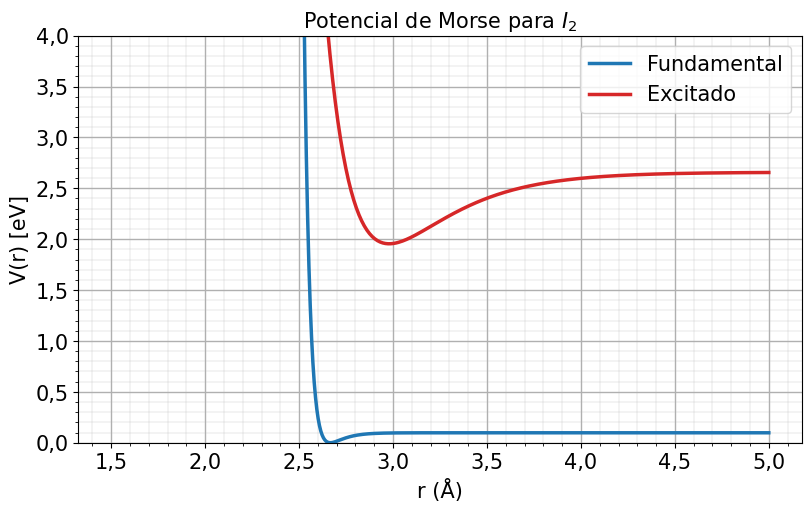

In [16]:

import locale

# Configurar locale para usar coma como decimal
locale.setlocale(locale.LC_NUMERIC, 'es_AR.UTF-8')  # Español Argentina

# Ejemplo de datos
R = np.linspace(1.5, 5.0, 500)

# Parámetros 
De_exc_list = prom_D  # eV
a_exc_list =  prom_a   # Å^-1

Re_exc = 2.979

De_fund = Dpp_exp
a_fund = app_A
Re_fund = 2.666

# Crear figura
fig, ax1 = plt.subplots(figsize=(8,5), constrained_layout=True)
V_fund = De_fund * (1 - np.exp(-a_fund*(R - Re_fund)))**2
ax1.plot(R, V_fund, label="Fundamental", color='#1f77b4', linewidth = 2.5)

colors =  '#d62728'

V_exc = De_exc_list * (1 - np.exp(-a_exc_list*(R - Re_exc)))**2 + DeltaE_el
ax1.plot(R, V_exc, label=f"Excitado", color=colors, linewidth = 2.5)



ax1.set_xlabel("r (Å)")
ax1.set_ylabel("V(r) [eV]")
ax1.set_title(r"Potencial de Morse para $I_2$")
ax1.set_ylim(0, 4)

# Cambiar ticks a coma como decimal
ax1.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: locale.format_string("%.1f", x)))
ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: locale.format_string("%.1f", y)))

ax1.grid(which="major", linewidth=1)
ax1.grid(which="minor", linewidth=0.2)
ax1.minorticks_on()
ax1.legend()

plt.savefig(r'C:\UNLP\3°\2° cuatrimestre\Exp Cuánticos I\EXP 3\potmorsemasdeltae.png', dpi=350, transparent=True)
plt.show()

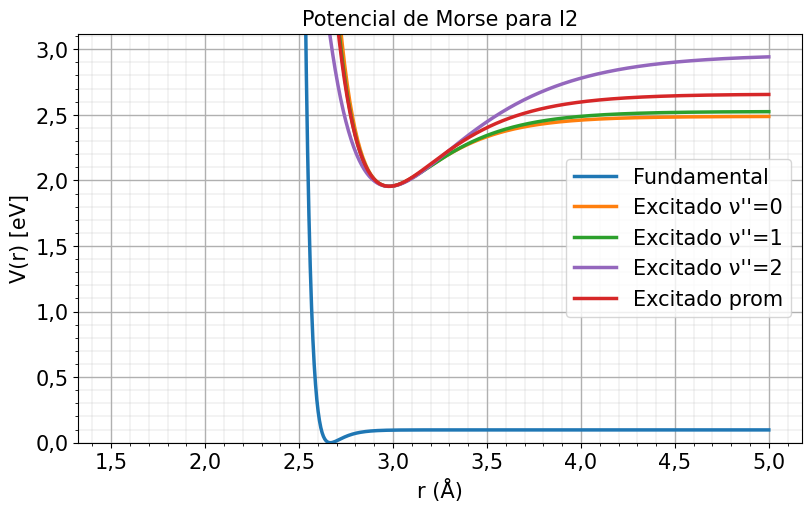

In [33]:

import locale

# Configurar locale para usar coma como decimal
locale.setlocale(locale.LC_NUMERIC, 'es_AR.UTF-8')  # Español Argentina

# Ejemplo de datos
R = np.linspace(1.5, 5.0, 500)

# Parámetros 
De_exc_list = [D0_exp, D1_exp, D2_exp, prom_D]  # eV
a_exc_list = [a0_A, a1_A, a2_A, prom_a]   # Å^-1
nu_labels = ["ν''=0", "ν''=1", "ν''=2", "prom"]
Re_exc = 2.979

De_fund = Dpp_exp
a_fund = app_A
Re_fund = 2.666

# Crear figura
fig, ax1 = plt.subplots(figsize=(8,5), constrained_layout=True)
V_fund = De_fund * (1 - np.exp(-a_fund*(R - Re_fund)))**2
ax1.plot(R, V_fund, label="Fundamental", color='#1f77b4', linewidth = 2.5)

colors = ['#ff7f0e', '#2ca02c', '#9467bd', '#d62728']
for i in range(4):
    V_exc = De_exc_list[i] * (1 - np.exp(-a_exc_list[i]*(R - Re_exc)))**2 + DeltaE_el
    ax1.plot(R, V_exc, label=f"Excitado {nu_labels[i]}", color=colors[i], linewidth = 2.5)



ax1.set_xlabel("r (Å)")
ax1.set_ylabel("V(r) [eV]")
ax1.set_title("Potencial de Morse para I2")
ax1.set_ylim(0, max(De_exc_list + [De_fund])*3.1)

# Cambiar ticks a coma como decimal
ax1.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: locale.format_string("%.1f", x)))
ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: locale.format_string("%.1f", y)))

ax1.grid(which="major", linewidth=1)
ax1.grid(which="minor", linewidth=0.2)
ax1.minorticks_on()
ax1.legend()

plt.savefig(r'C:\UNLP\3°\2° cuatrimestre\Exp Cuánticos I\EXP 3\potmorsemasdeltae.png', dpi=350, transparent=True)
plt.show()

In [85]:
print(lambda_series0)

[548.3 545.9 543.5 541.2 539.  536.9 534.8 532.8 530.9 529.1 527.3 525.6
 524.  522.5 521.  519.6 518.2 516.9 515.6 514.4 513.3 512.3 511.2 510.3
 509.4 508.5 507.7 506.9 506.2 505.6 504.9 504.3 503.7 503.2 502.7 502.2
 501.7 500.7 550.9 553.5 554.7 556.1 557.3 558.9 560.  561.8 562.8 564.7
 565.6 568.5 571.6 574.7 577.9 581.6 585.  588.5 592.  595.7 599.5 603.3
 607.2 611.3 615.2 616.6 619.4 623.5 627.9 628.6 629.1 631.9 632.4 633.4
 633.8 636.4 637.2 637.6 639.1 640.2 641.1 641.8 642.6 643.2 645.  645.7
 645.9 646.8 647.9 648.4 648.6 649.2 649.6]


# filtro 1 usando 1/T

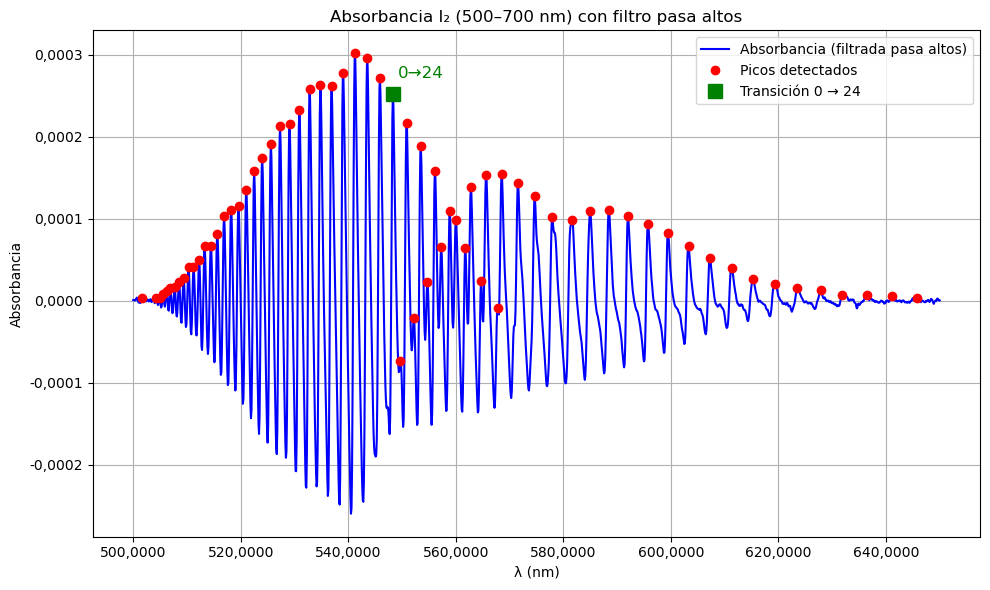

548.3
=== Picos detectados ===
Pico 1: λ = 501.70 nm, Abs = 0.00000
Pico 2: λ = 504.30 nm, Abs = 0.00000
Pico 3: λ = 504.90 nm, Abs = 0.00000
Pico 4: λ = 505.60 nm, Abs = 0.00001
Pico 5: λ = 506.20 nm, Abs = 0.00001
Pico 6: λ = 506.90 nm, Abs = 0.00002
Pico 7: λ = 507.70 nm, Abs = 0.00002
Pico 8: λ = 508.50 nm, Abs = 0.00002
Pico 9: λ = 509.40 nm, Abs = 0.00003
Pico 10: λ = 510.30 nm, Abs = 0.00004
Pico 11: λ = 511.20 nm, Abs = 0.00004
Pico 12: λ = 512.30 nm, Abs = 0.00005
Pico 13: λ = 513.30 nm, Abs = 0.00007
Pico 14: λ = 514.40 nm, Abs = 0.00007
Pico 15: λ = 515.60 nm, Abs = 0.00008
Pico 16: λ = 516.90 nm, Abs = 0.00010
Pico 17: λ = 518.20 nm, Abs = 0.00011
Pico 18: λ = 519.60 nm, Abs = 0.00012
Pico 19: λ = 521.00 nm, Abs = 0.00014
Pico 20: λ = 522.50 nm, Abs = 0.00016
Pico 21: λ = 524.00 nm, Abs = 0.00017
Pico 22: λ = 525.60 nm, Abs = 0.00019
Pico 23: λ = 527.30 nm, Abs = 0.00021
Pico 24: λ = 529.10 nm, Abs = 0.00022
Pico 25: λ = 530.90 nm, Abs = 0.00023
Pico 26: λ = 532.80 nm, Abs 

In [10]:


# === FILTRO PASA ALTOS BUTTERWORTH ===
orden = 3
Wn = 0.05  # frecuencia de corte normalizada (0 < Wn < 1)
b, a = butter(orden, Wn, btype='high')
T_filtrada = filtfilt(b, a, invT)

# === DETECCIÓN DE PICOS SOBRE LA SEÑAL FILTRADA ===
peaks, props = find_peaks(T_filtrada, prominence=0.000005)

# Pico objetivo solo por lambda
lambda_target = 548.33  # nm

# Buscar el índice del pico detectado más cercano a lambda_target
idx_target = (np.abs(Lambda_i2[peaks] - lambda_target)).argmin()
pk_target = peaks[idx_target]

# === GRAFICO: señal filtrada con pico destacado ===
plt.figure(figsize=(10,6))
plt.plot(Lambda_i2, T_filtrada, label="Absorbancia (filtrada pasa altos)", color='blue')
plt.plot(Lambda_i2[peaks], T_filtrada[peaks], 'ro', label="Picos detectados")
plt.plot(Lambda_i2[pk_target], T_filtrada[pk_target], 'gs', markersize=10, label="Transición 0 → 24")  # pico destacado

# Agregar texto indicando la transición
plt.text(Lambda_i2[pk_target]+1, T_filtrada[pk_target]+0.00002, "0→24", color='green', fontsize=12)

plt.xlabel("λ (nm)")
plt.ylabel("Absorbancia")
plt.title("Absorbancia I₂ (500–700 nm) con filtro pasa altos")
plt.legend()
plt.grid(True)
plt.gca().xaxis.set_major_formatter(mtick.FuncFormatter(formato_coma))
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(formato_coma))
plt.tight_layout()
plt.show()

print(Lambda_i2[pk_target])

# === IMPRIMIR VALORES DE LOS PICOS ===
print("=== Picos detectados ===")
for i, pk in enumerate(peaks):
    print(f"Pico {i+1}: λ = {Lambda_i2[pk]:.2f} nm, Abs = {T_filtrada[pk]:.5f}")







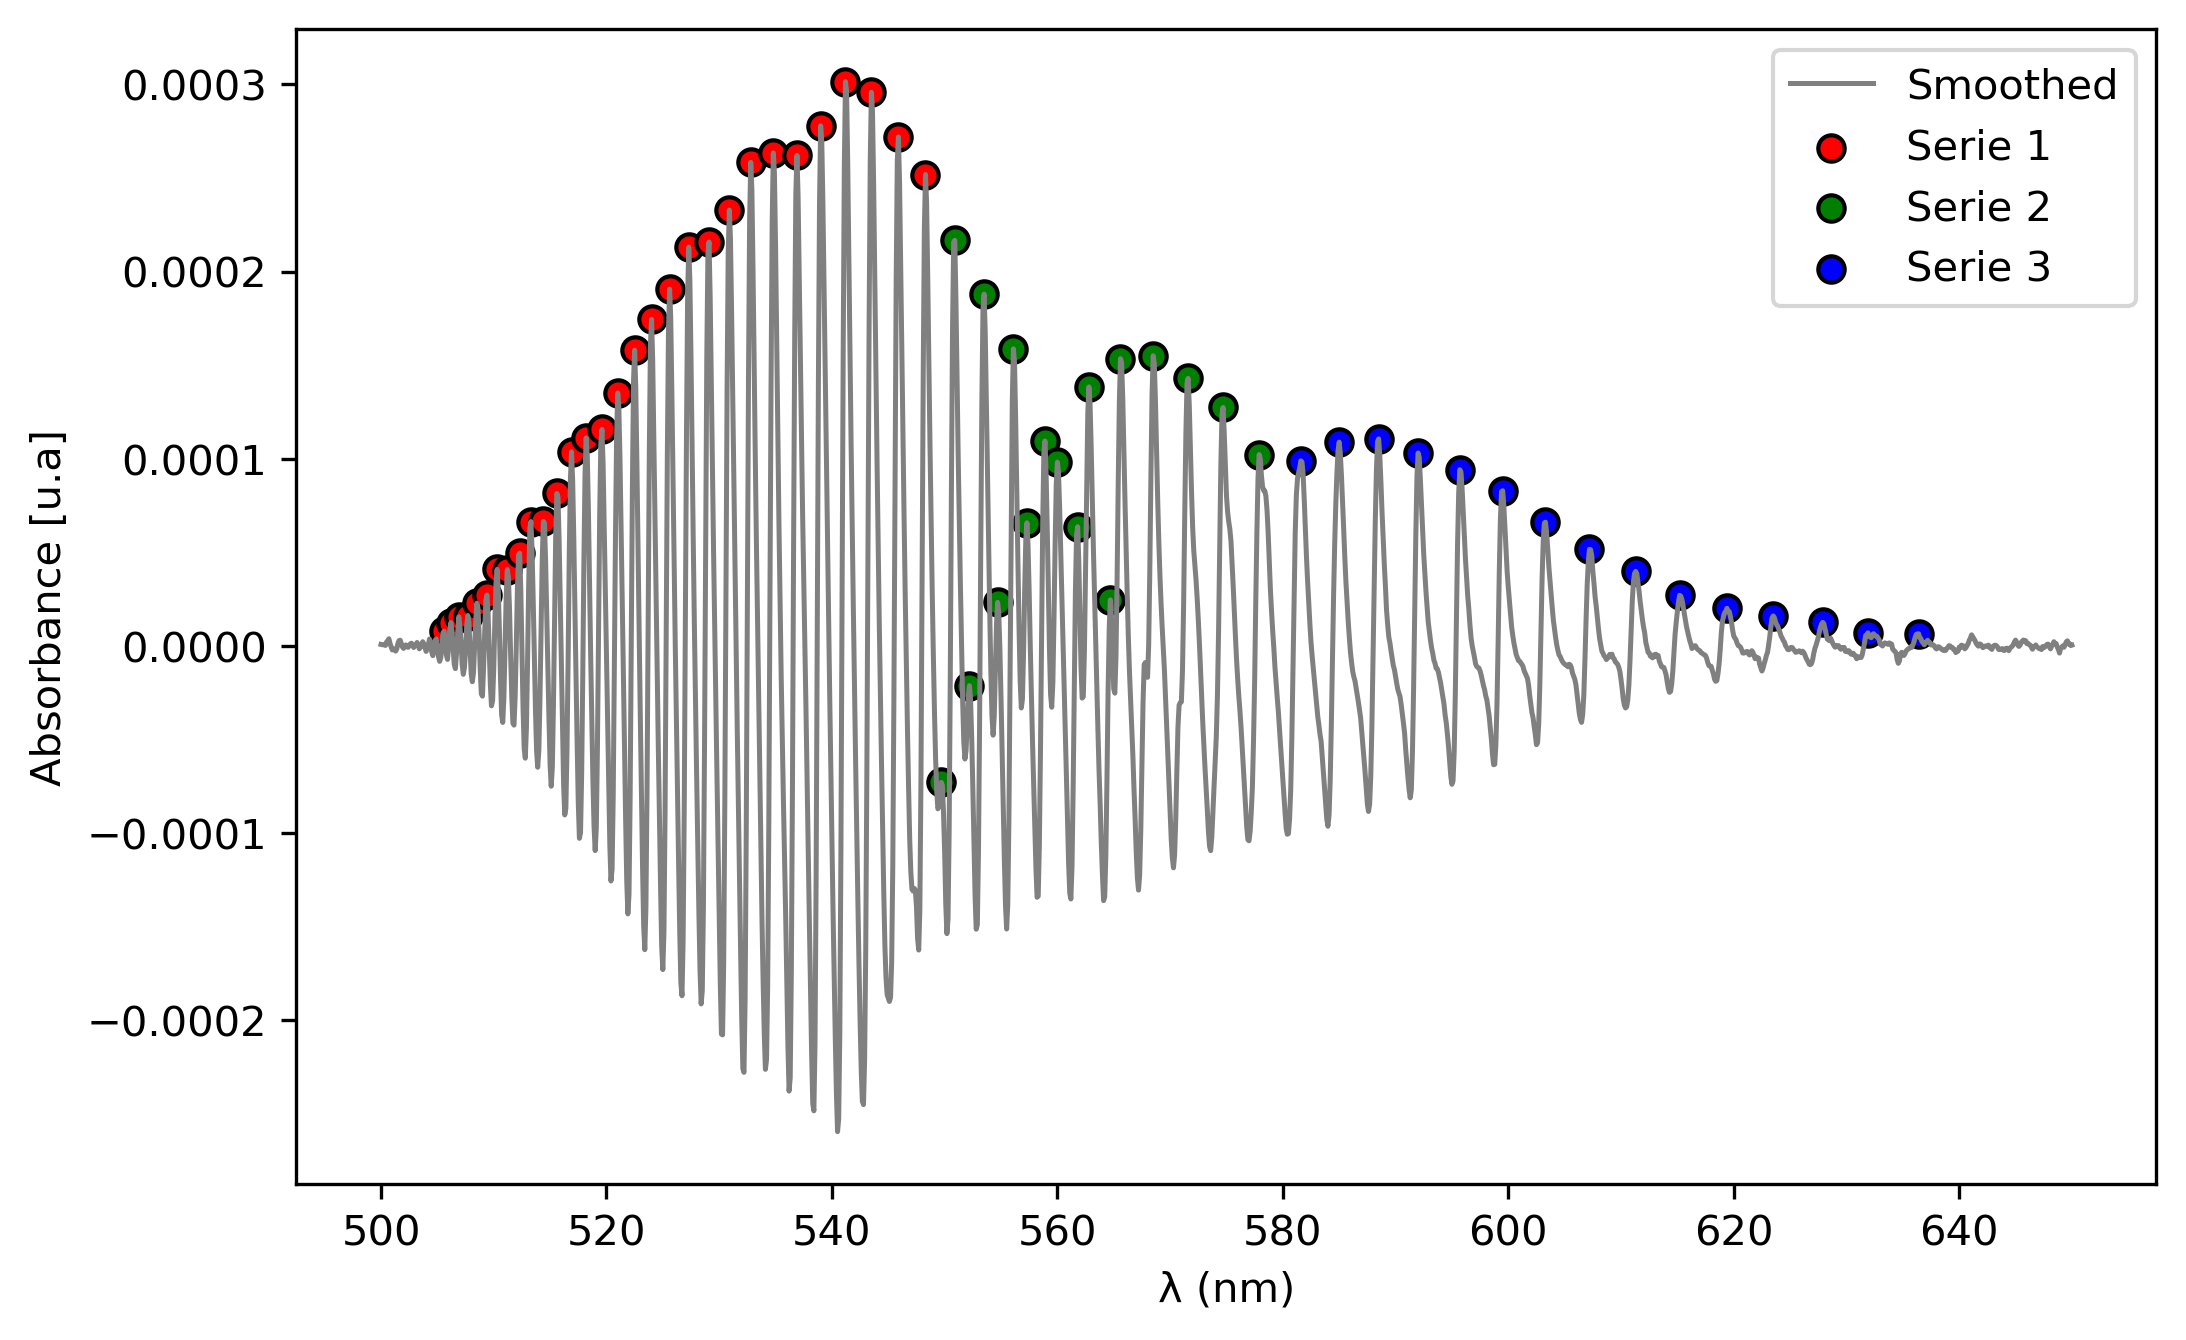

In [7]:
# Parámetros del filtro
orden = 3        # orden del filtro
fc = 0.05        # frecuencia de corte normalizada [0,1], donde 1 corresponde a la mitad de la frecuencia de muestreo

b, a = butter(orden, fc, btype='high', analog=False)
inv_T_suavizada = filtfilt(b, a, T)

# --- Detección de picos ---
picos, propiedades = find_peaks(inv_T_suavizada, prominence=0.00001)

# --- Definir rangos aproximados de las tres “campanas” electrónicas ---
# (ajustalos según tu gráfico real)
rangos = [
    (505, 549),   # primera serie vibracional
    (549, 579),   # segunda
    (579, 650)    # tercera
]

colores = ['red', 'green', 'blue']
labels = ["Serie 1" , 'Serie 2 ', 'Serie 3 ']

# --- Graficar ---
plt.figure(figsize=(8,5), dpi=300)
plt.plot(Lambda_i2, inv_T_suavizada, color='gray', linewidth=1.2, label='Smoothed')

for (λ_min, λ_max), color, label in zip(rangos, colores, labels):
    mask = (Lambda_i2[picos] >= λ_min) & (Lambda_i2[picos] < λ_max)
    plt.scatter(Lambda_i2[picos][mask], inv_T_suavizada[picos][mask],
                color=color, label=label, s=40, edgecolor='k')

plt.xlabel('λ (nm)')
plt.ylabel('Absorbance [u.a]')
plt.grid(False)
plt.legend()
plt.show()

# --- Imprimir información de los picos con color de serie ---
for i, pico in enumerate(picos):
    λ = Lambda_i2[pico]
    color = None
    for (λ_min, λ_max), nombre in zip(rangos, labels):
        if λ_min <= λ < λ_max:
            color = nombre
            break
    #print(f"Pico {i+1}: λ = {λ:.2f} nm, Intensidad = {inv_T_suavizada[pico]:.3f}, Serie = {color}")

 0: λ = 505.60 nm
 1: λ = 506.20 nm
 2: λ = 506.90 nm
 3: λ = 507.70 nm
 4: λ = 508.50 nm
 5: λ = 509.40 nm
 6: λ = 510.30 nm
 7: λ = 511.20 nm
 8: λ = 512.30 nm
 9: λ = 513.30 nm
10: λ = 514.40 nm
11: λ = 515.60 nm
12: λ = 516.90 nm
13: λ = 518.20 nm
14: λ = 519.60 nm
15: λ = 521.00 nm
16: λ = 522.50 nm
17: λ = 524.00 nm
18: λ = 525.60 nm
19: λ = 527.30 nm
20: λ = 529.10 nm
21: λ = 530.90 nm
22: λ = 532.80 nm
23: λ = 534.80 nm
24: λ = 536.90 nm
25: λ = 539.00 nm
26: λ = 541.20 nm
27: λ = 543.50 nm
28: λ = 545.90 nm
29: λ = 548.30 nm
30: λ = 549.70 nm
31: λ = 550.90 nm
32: λ = 552.20 nm
33: λ = 553.50 nm
34: λ = 554.70 nm
35: λ = 556.10 nm
36: λ = 557.30 nm
37: λ = 558.90 nm
38: λ = 560.00 nm
39: λ = 561.80 nm
40: λ = 562.80 nm
41: λ = 564.70 nm
42: λ = 565.60 nm
43: λ = 568.50 nm
44: λ = 571.60 nm
45: λ = 574.70 nm
46: λ = 578.00 nm
47: λ = 581.70 nm
48: λ = 585.00 nm
49: λ = 588.50 nm
50: λ = 592.10 nm
51: λ = 595.80 nm
52: λ = 599.50 nm
53: λ = 603.30 nm
54: λ = 607.30 nm
55: λ = 61

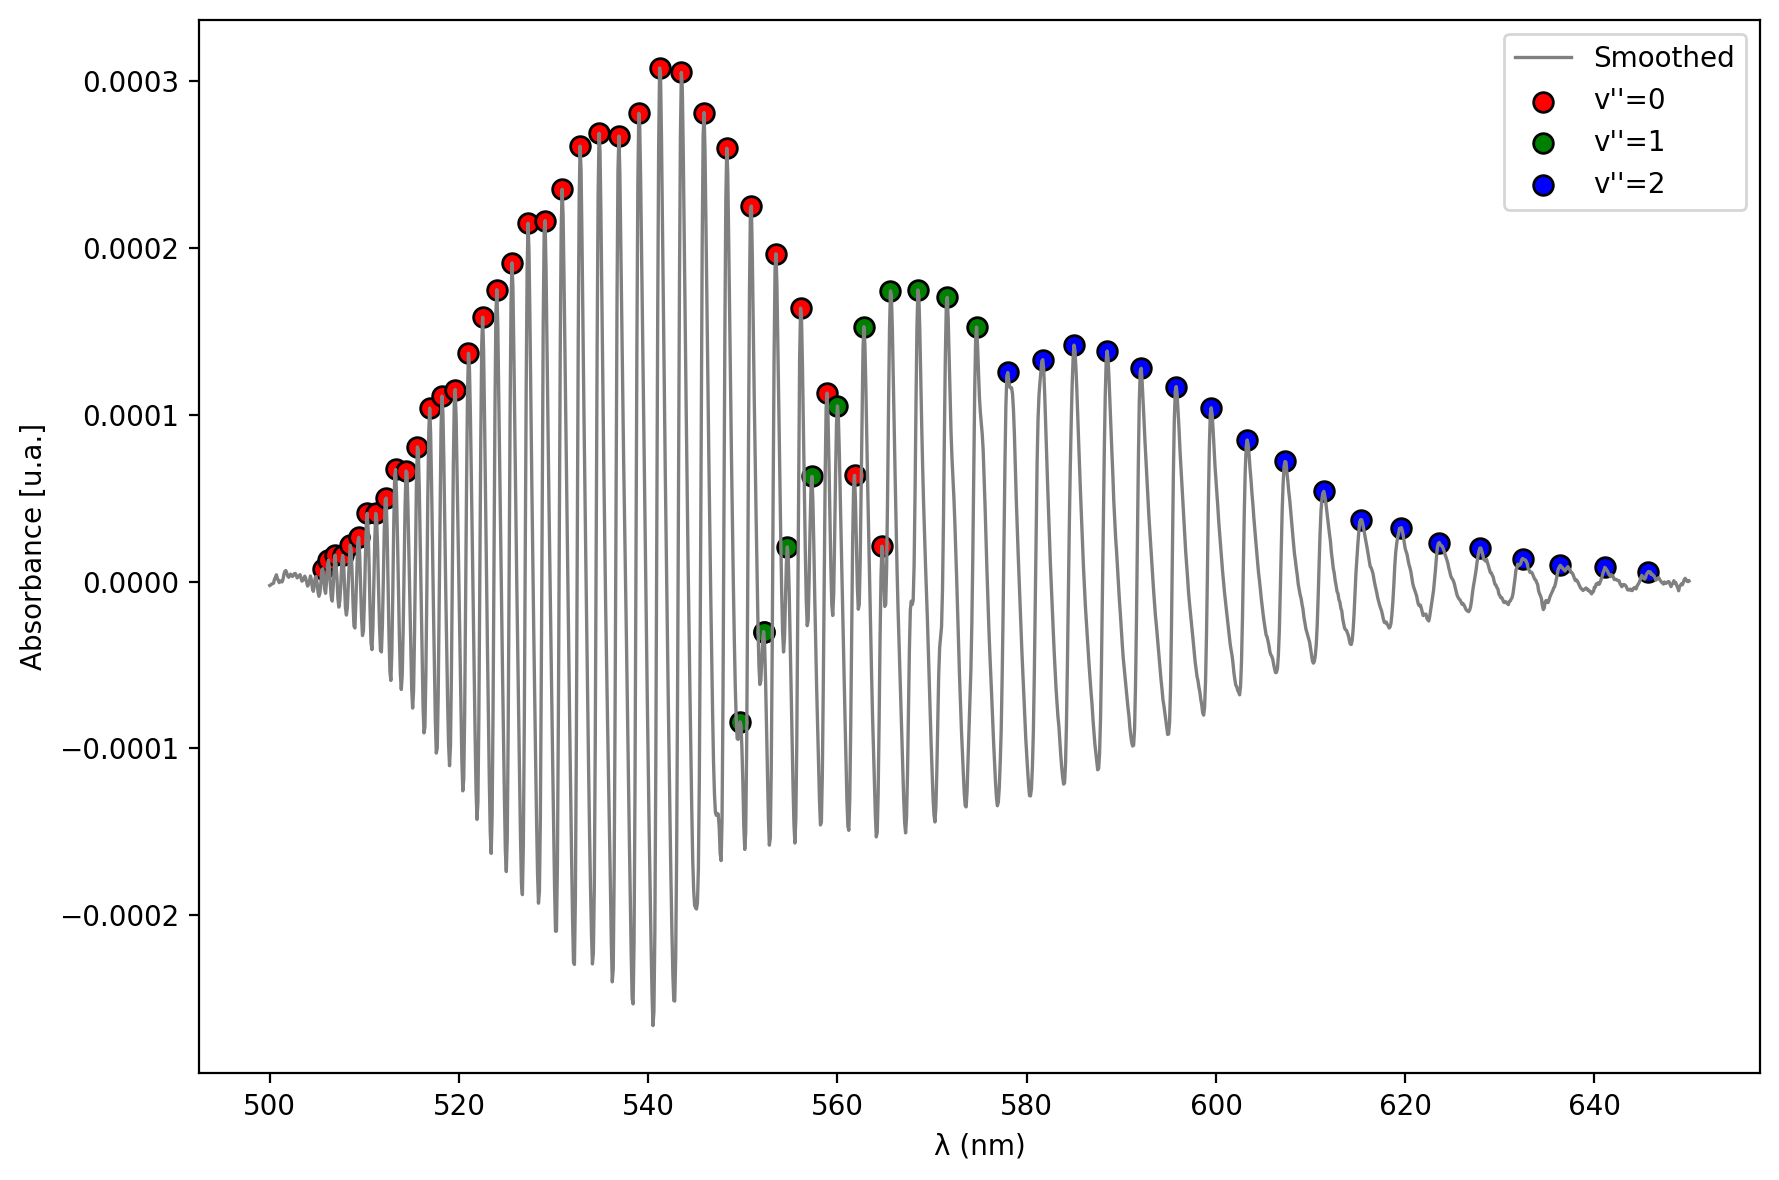

In [10]:



#filtro :p
orden = 3
fc = 0.02
b, a = butter(orden, fc, btype='high', analog=False)
inv_T_suavizada = filtfilt(b, a, T)
picos, propiedades = find_peaks(inv_T_suavizada, prominence=0.00001)
#print("Índices de picos detectados:\n")
for i, lam in enumerate(Lambda_i2[picos]):
    print(f"{i:2d}: λ = {lam:.2f} nm")


lambda_nm = np.array([
    505.60, 506.20, 506.90, 507.70, 508.50, 509.40, 510.30, 511.20,
    512.30, 513.30, 514.40, 515.60, 516.90, 518.20, 519.60, 521.00,
    522.50, 524.00, 525.60, 527.30, 529.10, 530.90, 532.80, 534.80,
    536.90, 539.00, 541.20, 543.50, 545.90, 548.30, 549.70, 550.90,
    552.20, 553.50, 554.70, 556.10, 557.30, 558.90, 560.00, 561.80,
    562.80, 564.70, 565.60, 568.50, 571.60, 574.70, 578.00, 581.70,
    585.00, 588.50, 592.10, 595.80, 599.50, 603.30, 607.30, 611.40,
    615.30, 619.60, 623.60, 627.90, 632.40, 636.40, 641.10, 645.70
])

#asignacion de peaks
serie1_idx = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,31,32,33,35,37,39,41]
serie2_idx = [30,32,34,36,38,40,42,43,44,45]
serie3_idx = [46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63]

#calculo energia de cada serie pero en cm^-1
E_cm = 1e7 / lambda_nm

# Energías de cada serie
E1 = E_cm[serie1_idx]
E2 = E_cm[serie2_idx]
E3 = E_cm[serie3_idx]

# Mostrar resultados
#print("Energías serie 1 (cm^-1):", E1)
#print("Energías serie 2 (cm^-1):", E2)
#print("Energías serie 3 (cm^-1):", E3)

series = {
    "v''=0": {"idx": serie1_idx, "color": "red"},
    "v''=1": {"idx": serie2_idx, "color": "green"},
    "v''=2": {"idx": serie3_idx, "color": "blue"},
}

#plot
plt.figure(figsize=(9,6), dpi=200)
plt.plot(Lambda_i2, inv_T_suavizada, color='gray', linewidth=1.2, label='Smoothed')

for nombre, datos in series.items():
    idx = np.array(datos["idx"], dtype=int)
    color = datos["color"]
    plt.scatter(Lambda_i2[picos][idx], inv_T_suavizada[picos][idx],
                color=color, edgecolor='k', s=50, label=nombre)

plt.xlabel("λ (nm)")
plt.ylabel("Absorbance [u.a.]")
plt.legend()
plt.grid(False)
plt.tight_layout()
plt.show()

for nombre, datos in series.items():
    #print(f"\n{name}")
    for i in datos["idx"]:
        λ = Lambda_i2[picos][i]
        inten = inv_T_suavizada[picos][i]
        #print(f"Pico {i:2d}: λ = {λ:.2f} nm, Intensidad = {inten:.5f}")


In [23]:
# === Energía en julios a partir de lambda en nm ===

# Constantes físicas
h = 6.62607015e-34   # Constante de Planck [J·s]
c = 2.99792458e8     # Velocidad de la luz [m/s]

def energia_julios(lambda_nm):
    """Devuelve la energía en julios para una longitud de onda en nm."""
    return (h * c) / (lambda_nm * 1e-9)

# === Energía a partir de longitud de onda en nm ===


eV = 1.602176634e-19     # 1 eV en julios [J/eV]

def energia_ev(lambda_nm):
    """
    Devuelve la energía correspondiente a una longitud de onda (nm).
    Retorna una tupla: (E_J, E_eV)
    """
    E_J = (h * c) / (lambda_nm * 1e-9)   # Energía en julios
    E_eV = E_J / eV                      # Energía en eV
    return  E_eV



lambda_nm = np.array([
    505.60, 506.20, 506.90, 507.70, 508.50, 509.40, 510.30, 511.20,
    512.30, 513.30, 514.40, 515.60, 516.90, 518.20, 519.60, 521.00,
    522.50, 524.00, 525.60, 527.30, 529.10, 530.90, 532.80, 534.80,
    536.90, 539.00, 541.20, 543.50, 545.90, 548.30, 549.70, 550.90,
    552.20, 553.50, 554.70, 556.10, 557.30, 558.90, 560.00, 561.80,
    562.80, 564.70, 565.60, 568.50, 571.60, 574.70, 578.00, 581.70,
    585.00, 588.50, 592.10, 595.80, 599.50, 603.30, 607.30, 611.40,
    615.30, 619.60, 623.60, 627.90, 632.40, 636.40, 641.10, 645.70
])

E_eV = energia_ev(lambda_nm)

serie1_idx = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,31,32,33,35,37,39,41]
serie2_idx = [30,32,34,36,38,40,42,43,44,45]
serie3_idx = [46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63]


serie1_E = E_eV[serie1_idx]
serie2_E = E_eV[serie2_idx]
serie3_E = E_eV[serie3_idx]

print("Energías totales (eV):")
for i, E in enumerate(E_eV):
    print(f"Pico {i:2d}: {E:10.3f} eV")

print("\nSerie 1 (energías en eV):")
print(np.round(serie1_E, 2))

print("\nSerie 2 (energías en eV):")
print(np.round(serie2_E, 2))

print("\nSerie 3 (energías en eV):")
print(np.round(serie3_E, 2))

Energías totales (eV):
Pico  0:      2.452 eV
Pico  1:      2.449 eV
Pico  2:      2.446 eV
Pico  3:      2.442 eV
Pico  4:      2.438 eV
Pico  5:      2.434 eV
Pico  6:      2.430 eV
Pico  7:      2.425 eV
Pico  8:      2.420 eV
Pico  9:      2.415 eV
Pico 10:      2.410 eV
Pico 11:      2.405 eV
Pico 12:      2.399 eV
Pico 13:      2.393 eV
Pico 14:      2.386 eV
Pico 15:      2.380 eV
Pico 16:      2.373 eV
Pico 17:      2.366 eV
Pico 18:      2.359 eV
Pico 19:      2.351 eV
Pico 20:      2.343 eV
Pico 21:      2.335 eV
Pico 22:      2.327 eV
Pico 23:      2.318 eV
Pico 24:      2.309 eV
Pico 25:      2.300 eV
Pico 26:      2.291 eV
Pico 27:      2.281 eV
Pico 28:      2.271 eV
Pico 29:      2.261 eV
Pico 30:      2.255 eV
Pico 31:      2.251 eV
Pico 32:      2.245 eV
Pico 33:      2.240 eV
Pico 34:      2.235 eV
Pico 35:      2.230 eV
Pico 36:      2.225 eV
Pico 37:      2.218 eV
Pico 38:      2.214 eV
Pico 39:      2.207 eV
Pico 40:      2.203 eV
Pico 41:      2.196 eV
Pico 42:   

## Energía en m^-1 -- G(v´) vs v´ :b

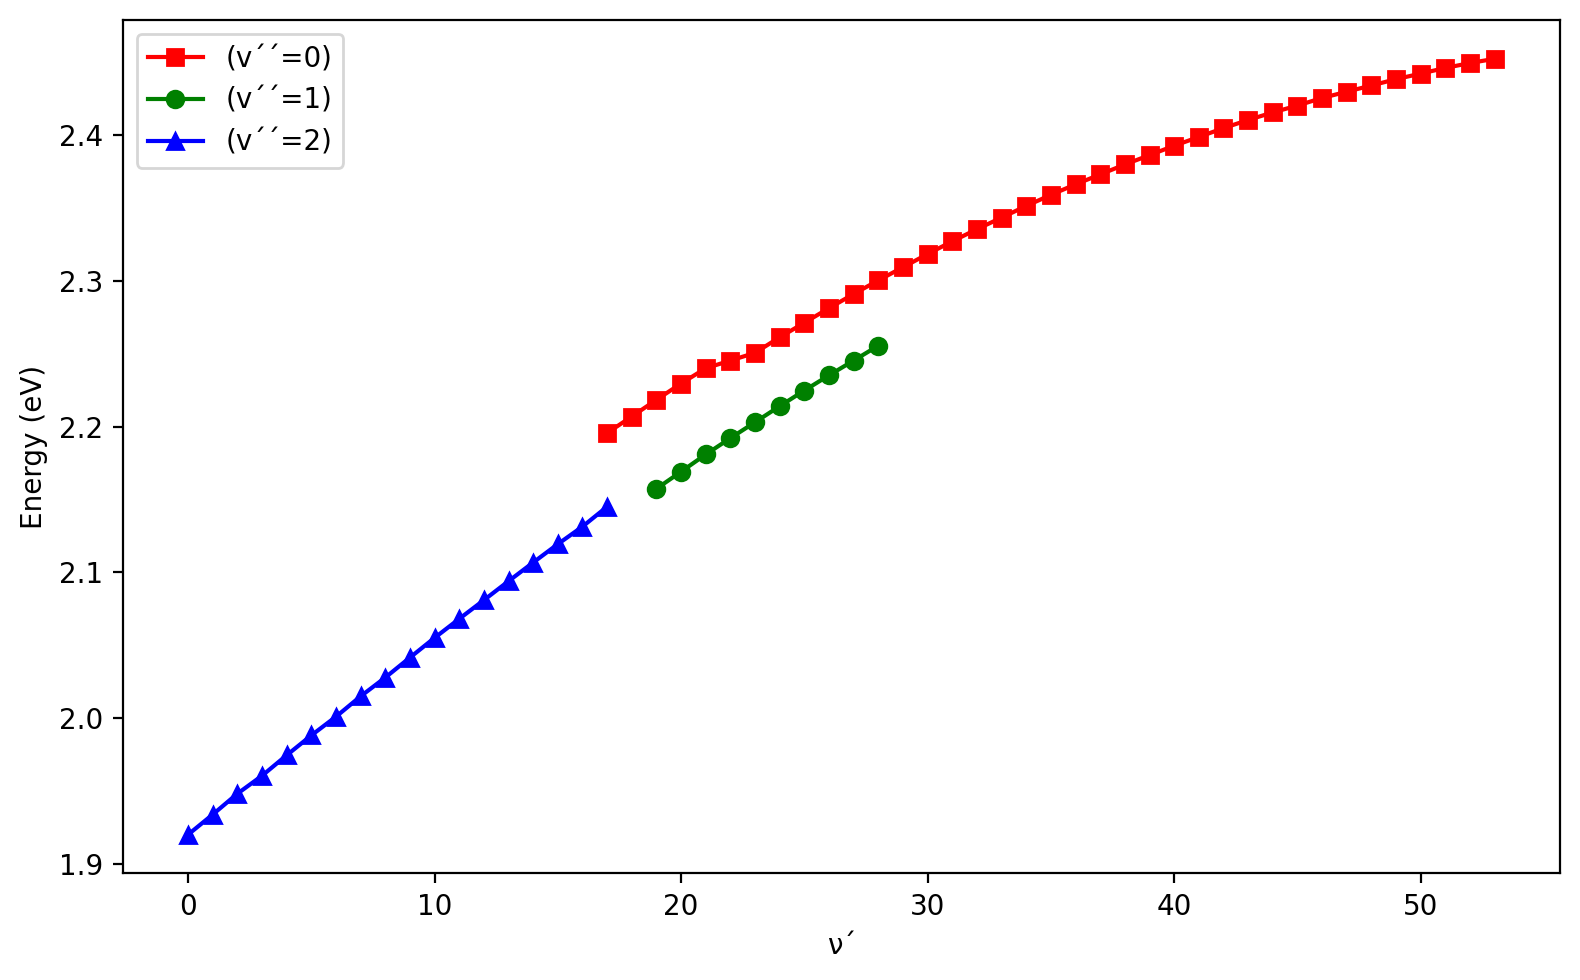

In [24]:


nu_0 = np.array([53,52,51,50,49,48,47,46,45,44,43,42,41,40,39,38,37,36,35,34,
                 33,32,31,30,29,28,27,26,25,24,23,22,21,20,19,18,17])



nu_1 = np.array([28,27,26,25,24,23,22,21,20,19])


nu_2 = np.array([17,16,15,14,13,12,11,10,9,8,7,6,5,4,3,2,1,0])
# plot con los circulos con bordes negros
plt.figure(figsize=(8,5), dpi=200)
plt.plot(nu_0, serie1_E, marker="s", label='(v´´=0)', color='red',)
plt.plot(nu_1, serie2_E,marker="o", label='(v´´=1)', color='green')
plt.plot(nu_2, serie3_E, marker="^", label='(v´´=2)', color='blue')

plt.xlabel('ν´')
plt.ylabel('Energy (eV)')
plt.grid(False)
plt.legend()
plt.tight_layout()
plt.show()





Desplazamiento óptimo entero para serie 2: 7
Desviación estándar final serie 2: 0.0175
Desplazamiento óptimo entero para serie 3: 4
Desviación estándar final serie 3: 0.0419


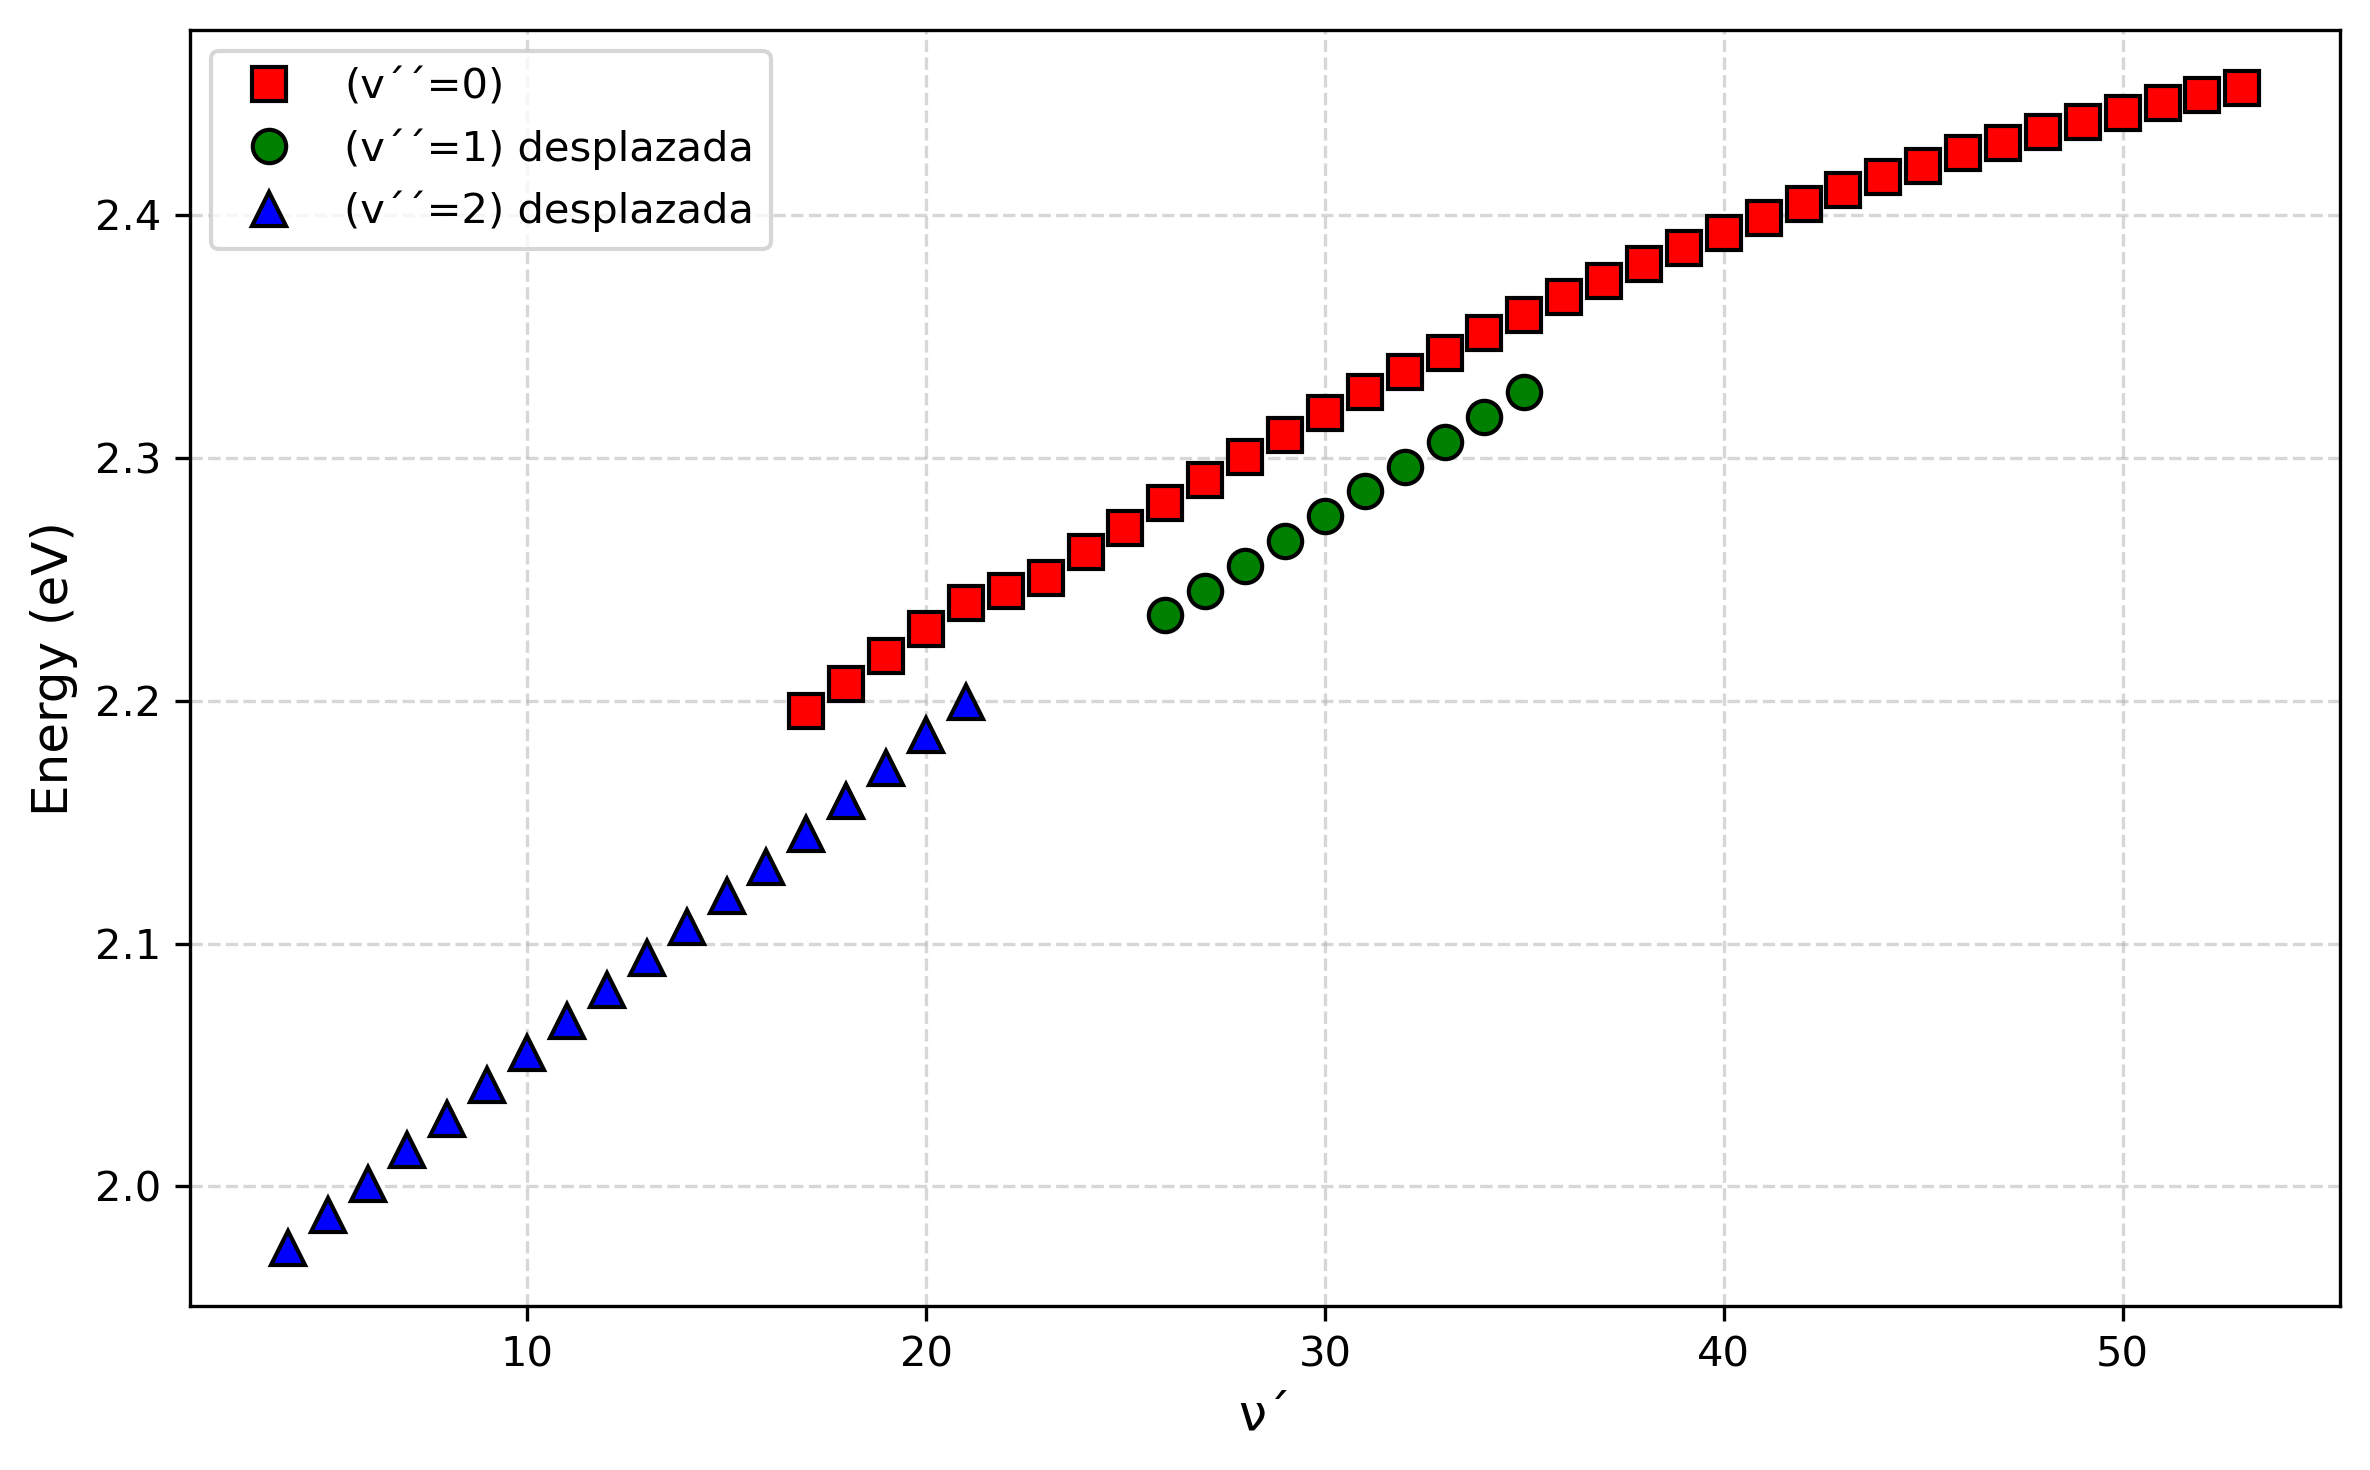

In [29]:
# --- Funciones interpolantes ---
E2_func = interp1d(nu_1, serie2_E, kind='linear', fill_value='extrapolate')
E3_func = interp1d(nu_2, serie3_E, kind='linear', fill_value='extrapolate')

# --- Rango de desplazamientos enteros ---
delta_range = np.arange(-10, 10, 1)  # por ejemplo de -5 a +5 ν´

# --- Serie 2 ---
stds2 = []
for d in delta_range:
    E2_shift = E2_func(nu_1 + d)
    min_len = min(len(serie1_E), len(E2_shift))
    delta_E = E2_shift[:min_len] - serie1_E[:min_len]
    stds2.append(np.std(delta_E))

# Desplazamiento entero óptimo
delta_nu_opt2 = delta_range[np.argmin(stds2)]
nu_1_shifted = nu_1 + delta_nu_opt2
E2_shifted = E2_func(nu_1_shifted)
delta_E_final2 = E2_shifted[:len(serie1_E)] - serie1_E[:len(E2_shifted)]

print(f"Desplazamiento óptimo entero para serie 2: {delta_nu_opt2}")
print("Desviación estándar final serie 2:", np.round(np.std(delta_E_final2),4))

# --- Serie 3 ---
stds3 = []
for d in delta_range:
    E3_shift = E3_func(nu_2 + d)
    min_len = min(len(serie1_E), len(E3_shift))
    delta_E = E3_shift[:min_len] - serie1_E[:min_len]
    stds3.append(np.std(delta_E))

delta_nu_opt3 = delta_range[np.argmin(stds3)]
nu_2_shifted = nu_2 + delta_nu_opt3
E3_shifted = E3_func(nu_2_shifted)
delta_E_final3 = E3_shifted[:len(serie1_E)] - serie1_E[:len(E3_shifted)]

print(f"Desplazamiento óptimo entero para serie 3: {delta_nu_opt3}")
print("Desviación estándar final serie 3:", np.round(np.std(delta_E_final3),4))

# --- Gráfico final ---
plt.figure(figsize=(8,5), dpi=300)
plt.plot(nu_0, serie1_E, marker="s", markersize=8, markeredgecolor='k', 
         label='(v´´=0)', color='red', linestyle='')
plt.plot(nu_1_shifted, E2_shifted, marker="o", markersize=8, markeredgecolor='k', 
         label='(v´´=1) desplazada', color='green', linestyle='')
plt.plot(nu_2_shifted, E3_shifted, marker="^", markersize=8, markeredgecolor='k', 
         label='(v´´=2) desplazada', color='blue', linestyle='')

plt.xlabel("ν´", fontsize=12)
plt.ylabel("Energy (eV)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()


# Fit

In [27]:

energy_1 = np.array([19778.48, 19755.04, 19727.76, 19696.67, 19665.68, 19630.94,
                     19596.32, 19561.82, 19519.81, 19481.78, 19440.12, 19394.88,
                     19346.1, 19297.57, 19245.57, 19193.86, 19138.76, 19083.97,
                     19025.88, 18964.54, 18900.02, 18835.94, 18768.77, 18698.58,
                     18625.44, 18552.88, 18477.46, 18399.26, 18318.37, 18238.19,
                     18152.11, 18109.38, 18066.85, 17982.38, 17892.29, 17799.93, 17708.52])
energy_2 = np.array([18191.74, 18109.38, 18027.76, 17943.66, 17857.14, 17768.3,
                     17680.34, 17590.15, 17494.75, 17400.38])
energy_3 = np.array([17301.04, 17190.99, 17094.02, 16992.35, 16889.04, 16784.16,
                     16680.57, 16575.5, 16466.33, 16355.9, 16252.23, 16139.44,
                     16035.92, 15926.1, 15812.78, 15713.39, 15598.19, 15487.07])

Parámetros (v´´=0): a=-0.837104, b=117.727776, c=15891.916899
Parámetros (v´´=1): a=-0.873826, b=129.770909, c=15202.390881
Parámetros (v´´=2): a=-0.272007, b=111.545232, c=15430.725912


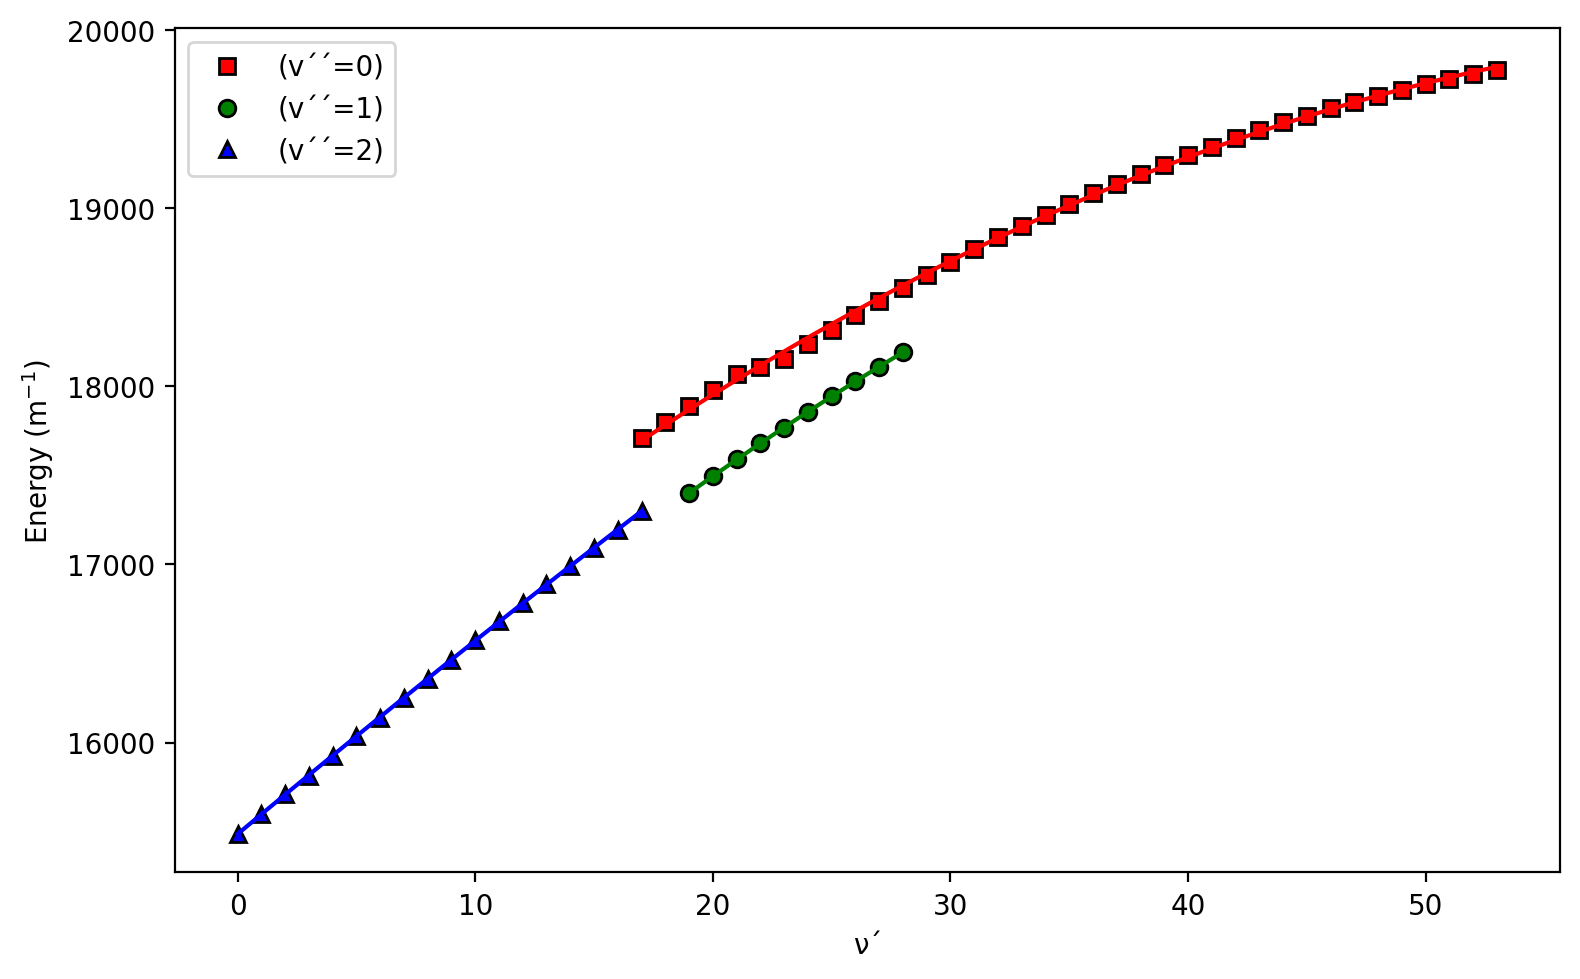

In [31]:
def ajuste_cuadratico(x, y, label):
    # Reemplazar x por x + 1/2
    x_shifted = x + 0.5
    
    # Ajuste polinomial de grado 2 sobre x_shifted
    coef = np.polyfit(x_shifted, y, 2)  # devuelve [a, b, c]
    print(f'Parámetros {label}: a={coef[0]:.6f}, b={coef[1]:.6f}, c={coef[2]:.6f}')
    
    # Crear valores ajustados para graficar la curva suave
    x_fit = np.linspace(min(x), max(x), 200)
    y_fit = np.polyval(coef, x_fit + 0.5)  # evaluamos usando x + 0.5
    return x_fit, y_fit

plt.figure(figsize=(8,5), dpi=200)

# Serie 1
plt.plot(nu_0, energy_1, marker="s", label='(v´´=0)', color='red', linestyle='None', markeredgecolor='black')
x_fit1, y_fit1 = ajuste_cuadratico(nu_0, energy_1, '(v´´=0)')
plt.plot(x_fit1, y_fit1, color='red', linestyle='-')

# Serie 2
plt.plot(nu_1, energy_2, marker="o", label='(v´´=1)', color='green', linestyle='None', markeredgecolor='black')
x_fit2, y_fit2 = ajuste_cuadratico(nu_1, energy_2, '(v´´=1)')
plt.plot(x_fit2, y_fit2, color='green', linestyle='-')

# Serie 3
plt.plot(nu_2, energy_3, marker="^", label='(v´´=2)', color='blue', linestyle='None', markeredgecolor='black')
x_fit3, y_fit3 = ajuste_cuadratico(nu_2, energy_3, '(v´´=2)')
plt.plot(x_fit3, y_fit3, color='blue', linestyle='-')

plt.xlabel('ν´')
plt.ylabel('Energy (m$^{-1}$)')
plt.grid(False)
plt.legend()
plt.tight_layout()
plt.show()